In [4]:
#!/usr/bin/env python
import pandas
import sqlite3

connection = sqlite3.connect("../data/gwas_g2p/metaxcan_results_p/metaxcan_results_v1.5.db")

In [5]:
pi = pandas.read_sql_query("SELECT p.tag, pi.portal FROM pheno as p INNER JOIN pheno_info as pi on p.id = pi.pheno_id", connection)

In [6]:
for t in pi.tag:
    print t

ADIPOGen_Adiponectin
ANGST_ANXIETY_CC
AdvancedAMD_2015
CARDIoGRAM_C4D_CAD_ADDITIVE
CARDIoGRAM_C4D_MI_ADDITIVE
CIAC
CKDGen_Chronic_Kidney_Disease
CKDGen_MA
CKDGen_UACR_DM
CKDGen_UACR_Overall
CKDGen_UACR_nonDM
CKDGen_eGFRcrea_DM
CKDGen_eGFRcrea_Overall
CKDGen_eGFRcrea_Overall_AFR
CKDGen_eGFRcrea_nonDM
CONVERGE_MDD
DIAGRAM_T2D_TRANS_ETHNIC
EAGLE_Eczema
EGG_BL
EGG_BMI_HapMapImputed
EGG_BW3_TransEthnic
EGG_HC
EGG_Obesity
EGG_Pubertal_growth_12M
GABRIEL_Asthma
GIANT_BMI_All_Ancestries
GIANT_HEIGHT
GIANT_HIP_Combined_All_Ancestries
GIANT_WC_Combined_All_Ancestries
GIANT_WHR_Combined_All_Ancestries
GLGC_Mc_HDL
GLGC_Mc_LDL
GLGC_Mc_TG
GPC-NEO-CONSCIENTIOUSNESS
GUGC_Gout
GUGC_UA
HRGene_HeartRate
IBD.EUR.Crohns_Disease
IBD.EUR.Inflammatory_Bowel_Disease
IBD.EUR.Ulcerative_Colitis
IGAP
IGROWTH
IHGC_Any_Migraine
IHGC_Migraine_with_Aura
IHGC_Migraine_without_Aura
ILAE_All_epilepsies
ILAE_Focal_epilepsy
ILAE_Genetic_generalised_epilepsy
IMMUNOBASE_Celiac_disease_hg19
IMMUNOBASE_Multiple_sclerosis_hg19

In [7]:
pi = pandas.read_sql_query("SELECT t.tissue FROM tissue AS t", connection)

In [8]:
pi

tissue
0                                  DGN_WB
1                    Adipose_Subcutaneous
2                Adipose_Visceral_Omentum
3                           Adrenal_Gland
4                            Artery_Aorta
5                         Artery_Coronary
6                           Artery_Tibial
7    Brain_Anterior_cingulate_cortex_BA24
8             Brain_Caudate_basal_ganglia
9             Brain_Cerebellar_Hemisphere
10                       Brain_Cerebellum
11                           Brain_Cortex
12               Brain_Frontal_Cortex_BA9
13                      Brain_Hippocampus
14                     Brain_Hypothalamus
15  Brain_Nucleus_accumbens_basal_ganglia
16            Brain_Putamen_basal_ganglia
17                  Breast_Mammary_Tissue
18      Cells_EBV-transformed_lymphocytes
19          Cells_Transformed_fibroblasts
20                          Colon_Sigmoid
21                       Colon_Transverse
22    Esophagus_Gastroesophageal_Junction
23                       Esophagus_Mucosa
24                   Esophagus_Muscularis
25                 Heart_Atrial_Appendage
26                   Heart_Left_Ventricle
27                                  Liver
28                                   Lung
29                        Muscle_Skeletal
30                           Nerve_Tibial
31                                  Ovary
32                               Pancreas
33                              Pituitary
34                               Prostate
35        Skin_Not_Sun_Exposed_Suprapubic
36             Skin_Sun_Exposed_Lower_leg
37         Small_Intestine_Terminal_Ileum
38                                 Spleen
39                                Stomach
40                                 Testis
41                                Thyroid
42                                 Uterus
43                                 Vagina
44                            Whole_Blood

In [9]:
''.join([  "SELECT",
  " g.gene_name,",
  " m.zscore,",
  " m.effect_size,",
  " m.pval,", 
  " p.tag as phenotype,",
  " t.tissue as tissue,",
  " m.pred_perf_R2,",
  " m.pred_perf_pval,",
  " m.pred_perf_qval,",
  " m.n_snps_used,",
  " m.n_snps_model,",
  " g.gene",
  " FROM gene AS g",
  " INNER JOIN metaxcan_result AS m ON g.id = m.gene_id ",
  " INNER JOIN tissue AS t ON t.id = m.tissue_id ",
  " INNER JOIN pheno AS p ON p.id = m.pheno_id ",   
])

'SELECT g.gene_name, m.zscore, m.effect_size, m.pval, p.tag as phenotype, t.tissue as tissue, m.pred_perf_R2, m.pred_perf_pval, m.pred_perf_qval, m.n_snps_used, m.n_snps_model, g.gene FROM gene AS g INNER JOIN metaxcan_result AS m ON g.id = m.gene_id  INNER JOIN tissue AS t ON t.id = m.tissue_id  INNER JOIN pheno AS p ON p.id = m.pheno_id '

In [78]:
query = 'SELECT g.gene_name, m.zscore, m.effect_size, m.pval, p.tag as phenotype, t.tissue as tissue, g.gene ' 
query += ' FROM gene AS g INNER JOIN metaxcan_result AS m ON g.id = m.gene_id' 
query += ' INNER JOIN tissue AS t ON t.id = m.tissue_id  INNER JOIN pheno AS p ON p.id = m.pheno_id'
#query += ' WHERE t.tissue = \'Adipose_Subcutaneous\''
query += ' WHERE p.tag = \'IBD.EUR.Inflammatory_Bowel_Disease\''
query += ' OR p.tag = \'IBD.EUR.Crohns_Disease\''
query += ' OR p.tag = \'IBD.EUR.Ulcerative_Colitis\''
query += ' OR p.tag = \'IMMUNOBASE_Systemic_lupus_erythematosus_hg19\''
query += ' OR p.tag = \'IMMUNOBASE_Celiac_disease_hg19\''
query += ' OR p.tag = \'IMMUNOBASE_Multiple_sclerosis_hg19\''
query += ' OR p.tag = \'RA_OKADA_TRANS_ETHNIC\''
query += ' OR p.tag = \'AdvancedAMD_2015\''
query += ' OR p.tag = \'pgc.scz2\''
query += ' OR p.tag = \'RA_OKADA_TRANS_ETHNIC\''
query += ' OR p.tag = \'dbGAP_Baranzini_MultipleSclerosis\''
query += ' OR p.tag = \'dbGAP_Duerr_InflammatoryBowelDisease\''
query += ' OR p.tag = \'dbGAP_Hom_SystemicLupusErythematosus\''
query += ' OR p.tag = \'dbGAP_Hunter_BreastCancer\''

In [79]:
pi = pandas.read_sql_query(query, connection)

In [80]:
id2tissue = sorted(set(pi.tissue))
id2gene = sorted(set(pi.gene))
id2phenotype = sorted(set(pi.phenotype))

tissue2id = {t:i for i, t in enumerate(id2tissue)}
phenotype2id = {t:i for i, t in enumerate(id2phenotype)}
gene2id = {t:i for i, t in enumerate(id2gene)}

In [81]:
pi

gene_name        zscore  effect_size           pval         phenotype  \
0             CFH -3.703754e+01          NaN  2.849922e-300  AdvancedAMD_2015   
1         PLEKHA1 -2.893969e+01          NaN  3.783905e-184  AdvancedAMD_2015   
2            RDBP  1.952744e+01          NaN   6.418038e-85  AdvancedAMD_2015   
3          SKIV2L -1.580431e+01          NaN   2.905327e-56  AdvancedAMD_2015   
4             CFB  1.484321e+01          NaN   7.697715e-50  AdvancedAMD_2015   
5            PPT2  1.290753e+01          NaN   4.081589e-38  AdvancedAMD_2015   
6           EGFL8  1.229259e+01          NaN   9.927563e-35  AdvancedAMD_2015   
7            MSH5  1.086974e+01          NaN   1.606565e-27  AdvancedAMD_2015   
8              C2  1.055793e+01          NaN   4.668598e-26  AdvancedAMD_2015   
9           FKBPL  9.949465e+00          NaN   2.535419e-23  AdvancedAMD_2015   
10       HLA-DQA1 -9.599649e+00          NaN   8.021690e-22  AdvancedAMD_2015   
11       HLA-DQB1 -9.349078e+00          NaN   8.841466e-21  AdvancedAMD_2015   
12           APOM -9.275133e+00          NaN   1.773969e-20  AdvancedAMD_2015   
13        CYP21A2  8.920790e+00          NaN   4.629746e-19  AdvancedAMD_2015   
14           TNXB  8.366379e+00          NaN   5.941584e-17  AdvancedAMD_2015   
15       HLA-DQB2  8.180460e+00          NaN   2.827635e-16  AdvancedAMD_2015   
16         POU5F1 -7.665810e+00          NaN   1.777058e-14  AdvancedAMD_2015   
17        ABHD16A -7.048511e+00          NaN   1.808429e-12  AdvancedAMD_2015   
18       PLA2G12A  6.825885e+00          NaN   8.738482e-12  AdvancedAMD_2015   
19           MICB -6.760383e+00          NaN   1.376271e-11  AdvancedAMD_2015   
20          PRRT1  6.733170e+00          NaN   1.660063e-11  AdvancedAMD_2015   
21          ATF6B  6.611530e+00          NaN   3.803670e-11  AdvancedAMD_2015   
22          ATAT1  6.246737e+00          NaN   4.191169e-10  AdvancedAMD_2015   
23        BLOC1S1  6.179104e+00          NaN   6.446652e-10  AdvancedAMD_2015   
24           AIF1  6.164869e+00          NaN   7.054173e-10  AdvancedAMD_2015   
25         SPDYE3 -5.905212e+00          NaN   3.521940e-09  AdvancedAMD_2015   
26           RDH5 -5.855027e+00          NaN   4.769338e-09  AdvancedAMD_2015   
27          BCAR1 -5.835969e+00          NaN   5.347872e-09  AdvancedAMD_2015   
28          MEPCE -5.785811e+00          NaN   7.216342e-09  AdvancedAMD_2015   
29          PILRB  5.613794e+00          NaN   1.979377e-08  AdvancedAMD_2015   
...           ...           ...          ...            ...               ...   
2536320     MUTYH  8.348047e-03     0.000720   9.933393e-01          pgc.scz2   
2536321     UFD1L -8.233529e-03     0.004342   9.934307e-01          pgc.scz2   
2536322      GOT1  7.994269e-03     0.000948   9.936216e-01          pgc.scz2   
2536323      VNN3 -7.959589e-03    -0.000398   9.936492e-01          pgc.scz2   
2536324      DOLK  7.689729e-03     0.001555   9.938645e-01          pgc.scz2   
2536325      ULK4 -7.449877e-03     0.000051   9.940559e-01          pgc.scz2   
2536326    TEX261  7.076748e-03    -0.000925   9.943536e-01          pgc.scz2   
2536327   TRABD2A -6.679737e-03    -0.000392   9.946704e-01          pgc.scz2   
2536328   BCL2L13  6.659686e-03     0.002365   9.946864e-01          pgc.scz2   
2536329      FRG1 -6.521143e-03     0.009405   9.947969e-01          pgc.scz2   
2536330     CLIC4 -6.497178e-03     0.004748   9.948160e-01          pgc.scz2   
2536331    TSEN15 -6.454887e-03    -0.005269   9.948498e-01          pgc.scz2   
2536332   CCDC137 -6.311161e-03     0.001079   9.949645e-01          pgc.scz2   
2536333     KLF11 -5.913361e-03    -0.000061   9.952818e-01          pgc.scz2   
2536334    MRPS33  5.772234e-03    -0.002176   9.953944e-01          pgc.scz2   
2536335    CCSER2  5.375275e-03     0.000125   9.957112e-01          pgc.scz2   
2536336  ARHGAP22 -5.322142e-03     0.000246   9.957536e-01          pgc.scz2   
2536337   ZSCAN18  4.637279e-03     0.0

In [85]:
id2phenotype

[u'AdvancedAMD_2015',
 u'IBD.EUR.Crohns_Disease',
 u'IBD.EUR.Inflammatory_Bowel_Disease',
 u'IBD.EUR.Ulcerative_Colitis',
 u'IMMUNOBASE_Celiac_disease_hg19',
 u'IMMUNOBASE_Multiple_sclerosis_hg19',
 u'IMMUNOBASE_Systemic_lupus_erythematosus_hg19',
 u'RA_OKADA_TRANS_ETHNIC',
 u'dbGAP_Baranzini_MultipleSclerosis',
 u'dbGAP_Duerr_InflammatoryBowelDisease',
 u'dbGAP_Hom_SystemicLupusErythematosus',
 u'dbGAP_Hunter_BreastCancer',
 u'pgc.scz2']

In [86]:
import numpy as np

#mat = np.zeros((len(id2phenotype), len(id2gene)))
mat = np.zeros((len(id2phenotype), len(id2tissue), len(id2gene)))

In [87]:
ind_mat = np.zeros_like(mat)
for i, (z, g, t, p) in enumerate(zip(pi.zscore, pi.gene, pi.tissue, pi.phenotype)):
    mat[phenotype2id[p], tissue2id[t], gene2id[g]] = z
    ind_mat[phenotype2id[p], tissue2id[t], gene2id[g]] = 1

In [88]:
import matplotlib.pyplot as plt
import seaborn.apionly as sns
% matplotlib inline

In [89]:
ind = (np.abs(mat).max(axis = (0, 1)) > 5.) & np.all(np.isfinite(mat), axis = (0, 1))

In [90]:
mat0 = mat[:, :, ind]

In [91]:
mat0.shape

(13, 45, 949)

In [92]:
import pandas as pd

In [93]:
ind_mat0 = ind_mat[:, :, ind]

In [94]:
ind_mat0.shape, mat0.shape

((13, 45, 949), (13, 45, 949))

In [95]:
import tensor_completion as tc

In [96]:
ind_test0 = np.random.rand(*ind_mat0.shape)

In [97]:
ind_test = (ind_test0 <= 0.5) * ind_mat0
ind_train = (ind_test0 >= 0.5) * ind_mat0

In [99]:
mat_train = mat0 * ind_train
res_tc = tc.HaLRTC(mat_train, ind_train, [1.0, 1.0, 1.0], 1e-5, 500)

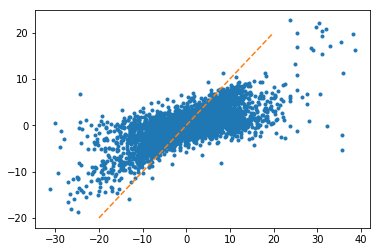

In [100]:
plt.plot(mat0[ind_test > 0.5], res_tc[ind_test > 0.5], '.')
plt.plot([-20, 20], [-20, 20], '--')
plt.show()

In [101]:
np.corrcoef(mat0[ind_test > 0.5], res_tc[ind_test > 0.5])[1,0]

0.6812635319224764

In [102]:
import matrix_completion as mc

res_mc = np.zeros_like(mat_train)

for i in range(len(id2phenotype)):
    res, obj_vals = mc.matrix_imputing_ADMM(ind_train[i], mat_train[i], 1e-6, mat_train[i], 1e-5, 500, compute_obj = True, fat = True)
    res_mc[i] = res

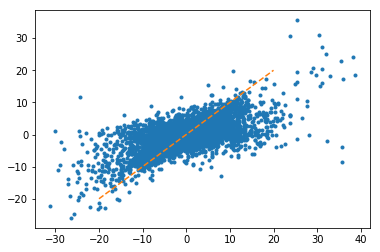

0.6348801911791926

In [103]:
plt.plot(mat0[ind_test > 0.5], res_mc[ind_test > 0.5], '.')
plt.plot([-20, 20], [-20, 20], '--')
plt.show()

np.corrcoef(mat0[ind_test > 0.5], res_mc[ind_test > 0.5])[1,0]

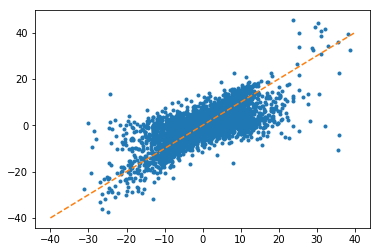

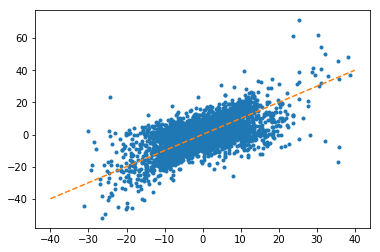

In [109]:
plt.plot(mat0[ind_test > 0.5], 2.0 * res_tc[ind_test > 0.5], '.')
plt.plot([-40, 40], [-40, 40], '--')
plt.show()

plt.plot(mat0[ind_test > 0.5], 2.0 * res_mc[ind_test > 0.5], '.')
plt.plot([-40, 40], [-40, 40], '--')
plt.show()

AdvancedAMD_2015


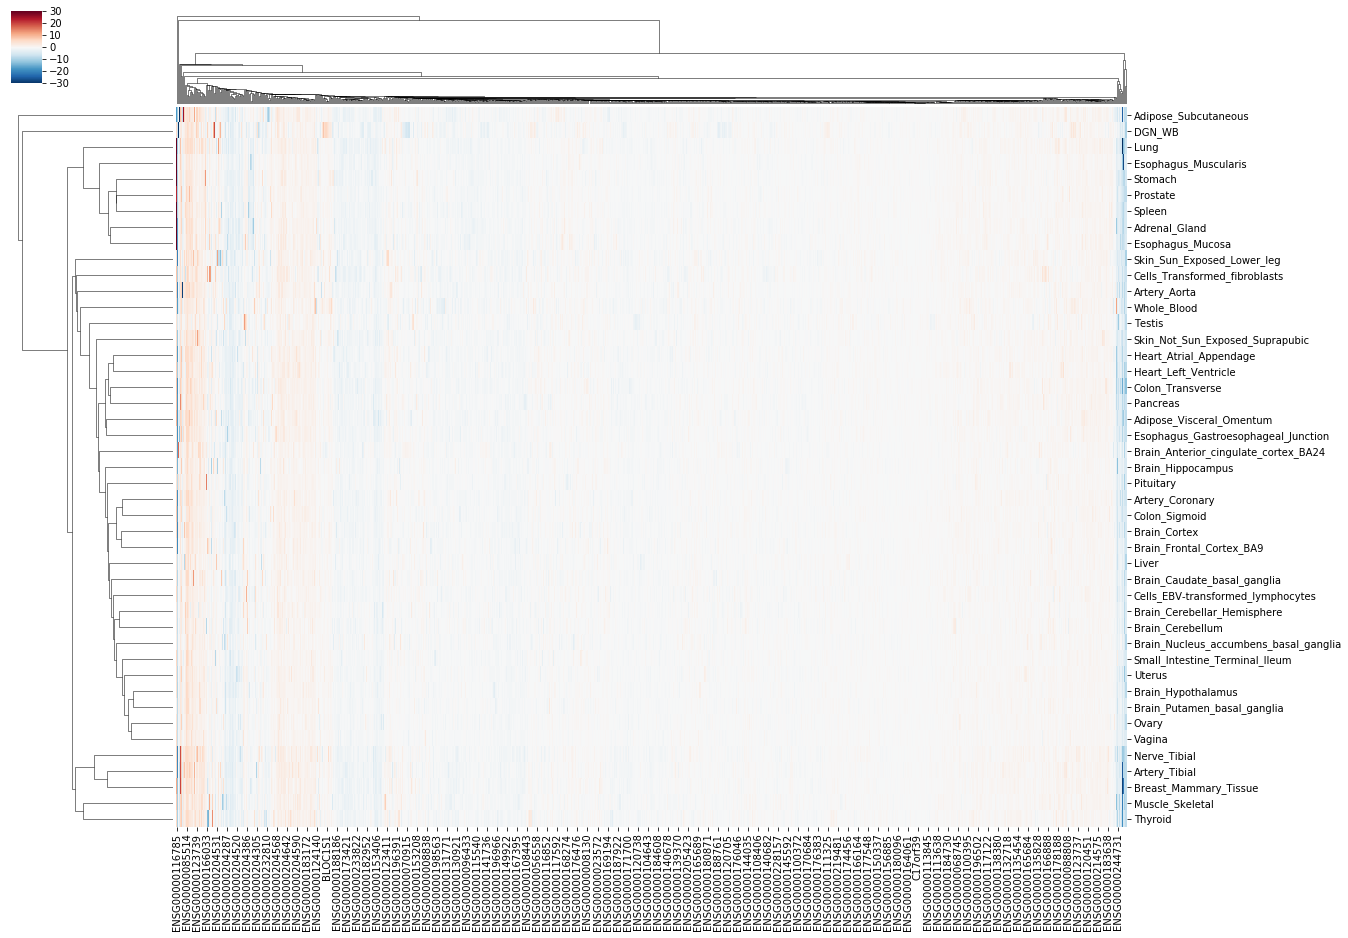

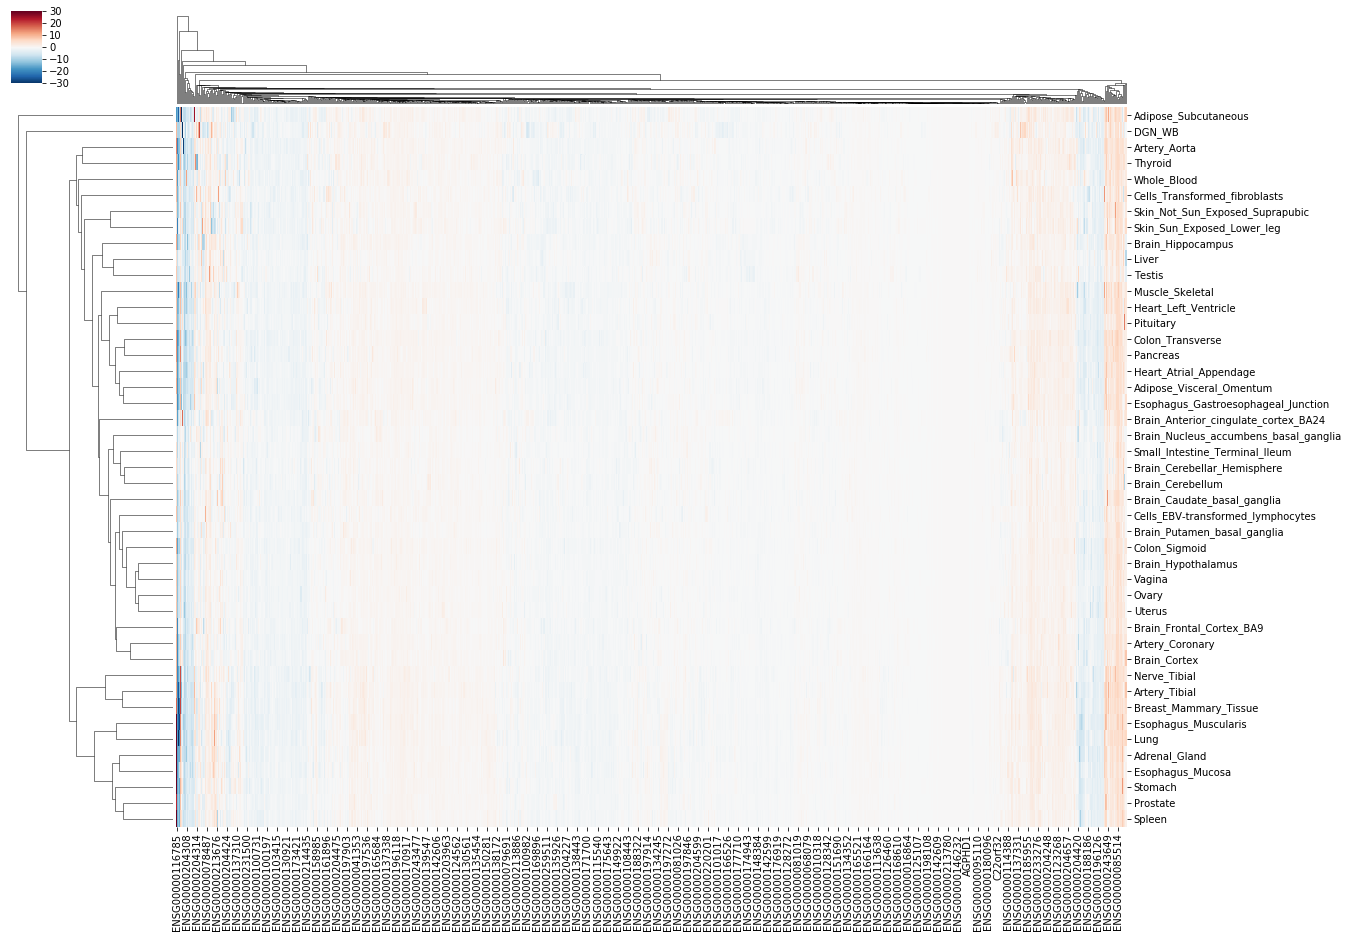

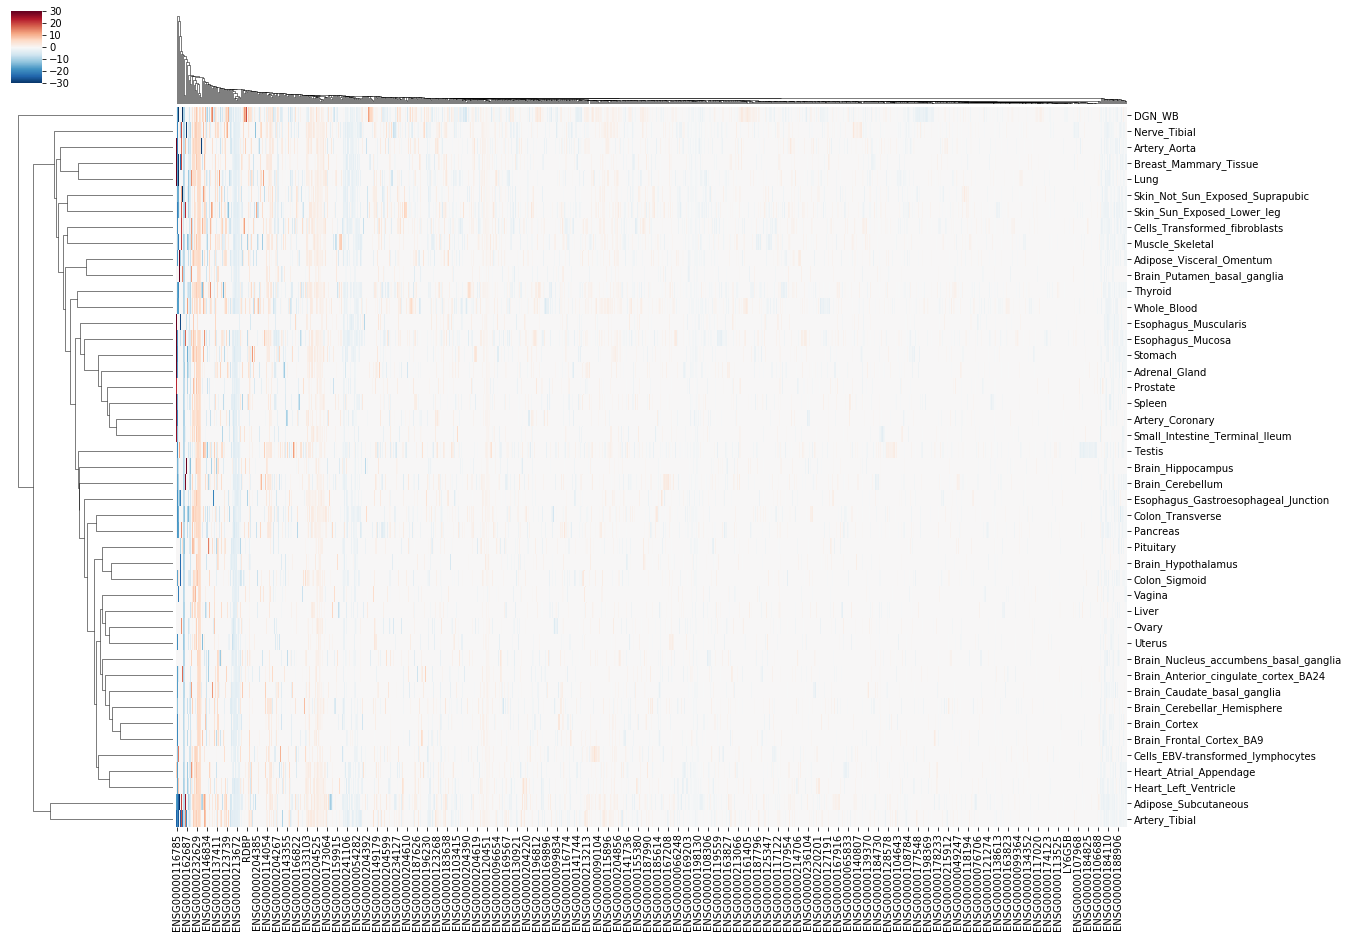

IBD.EUR.Crohns_Disease


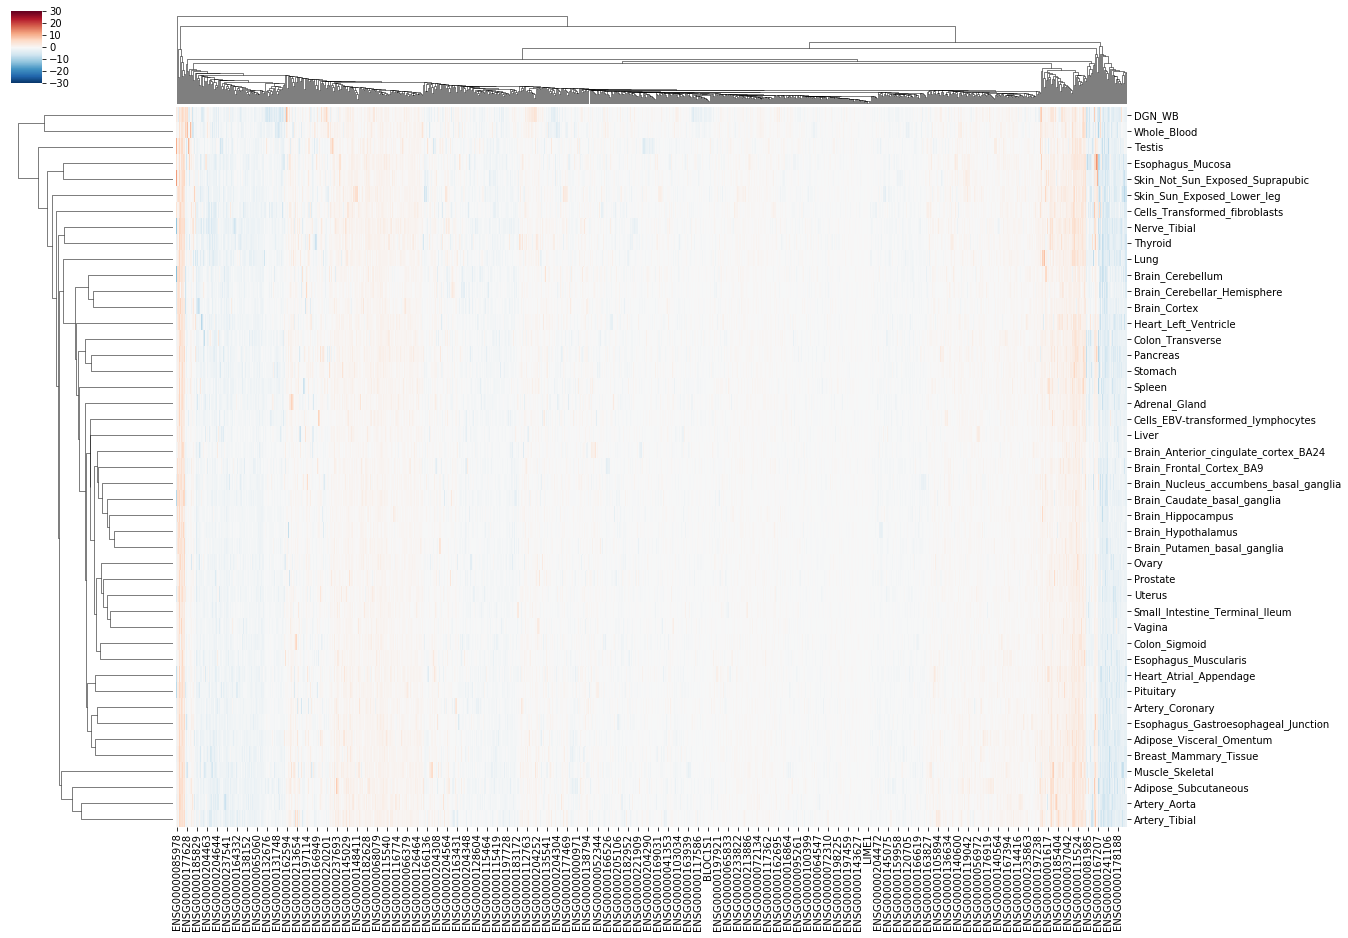

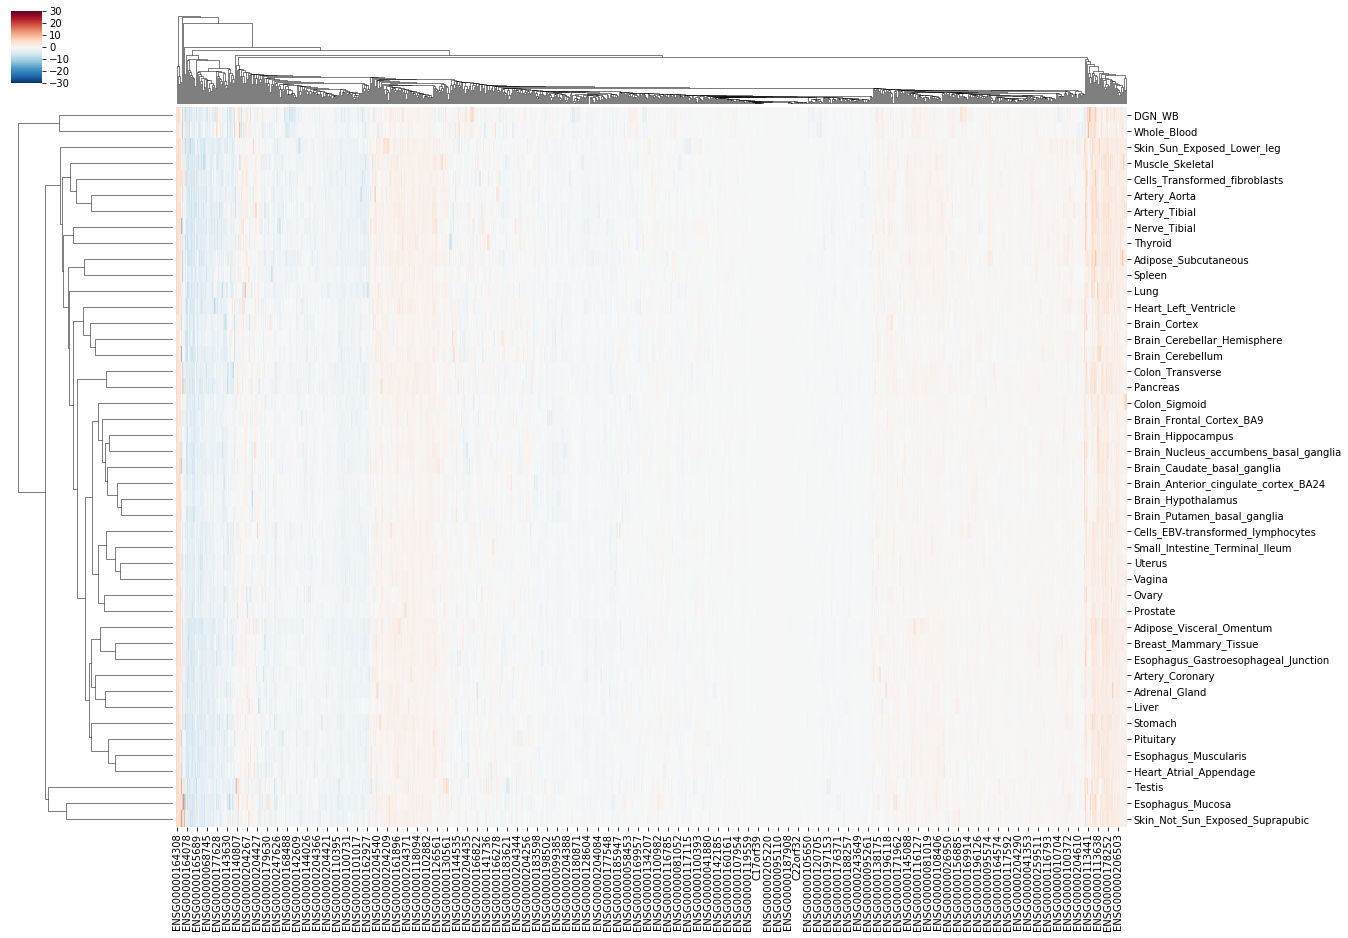

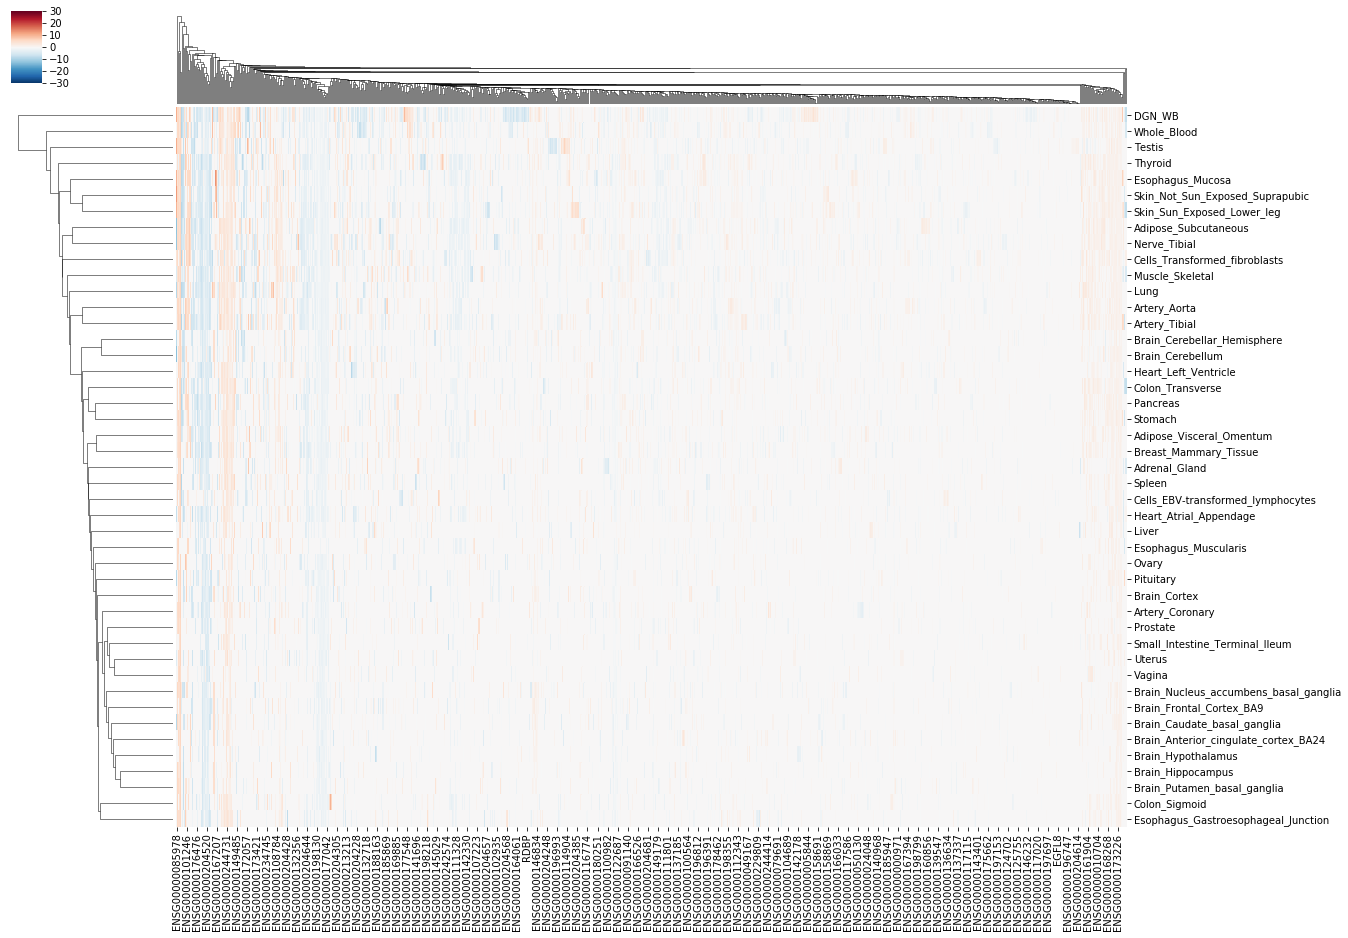

IBD.EUR.Inflammatory_Bowel_Disease


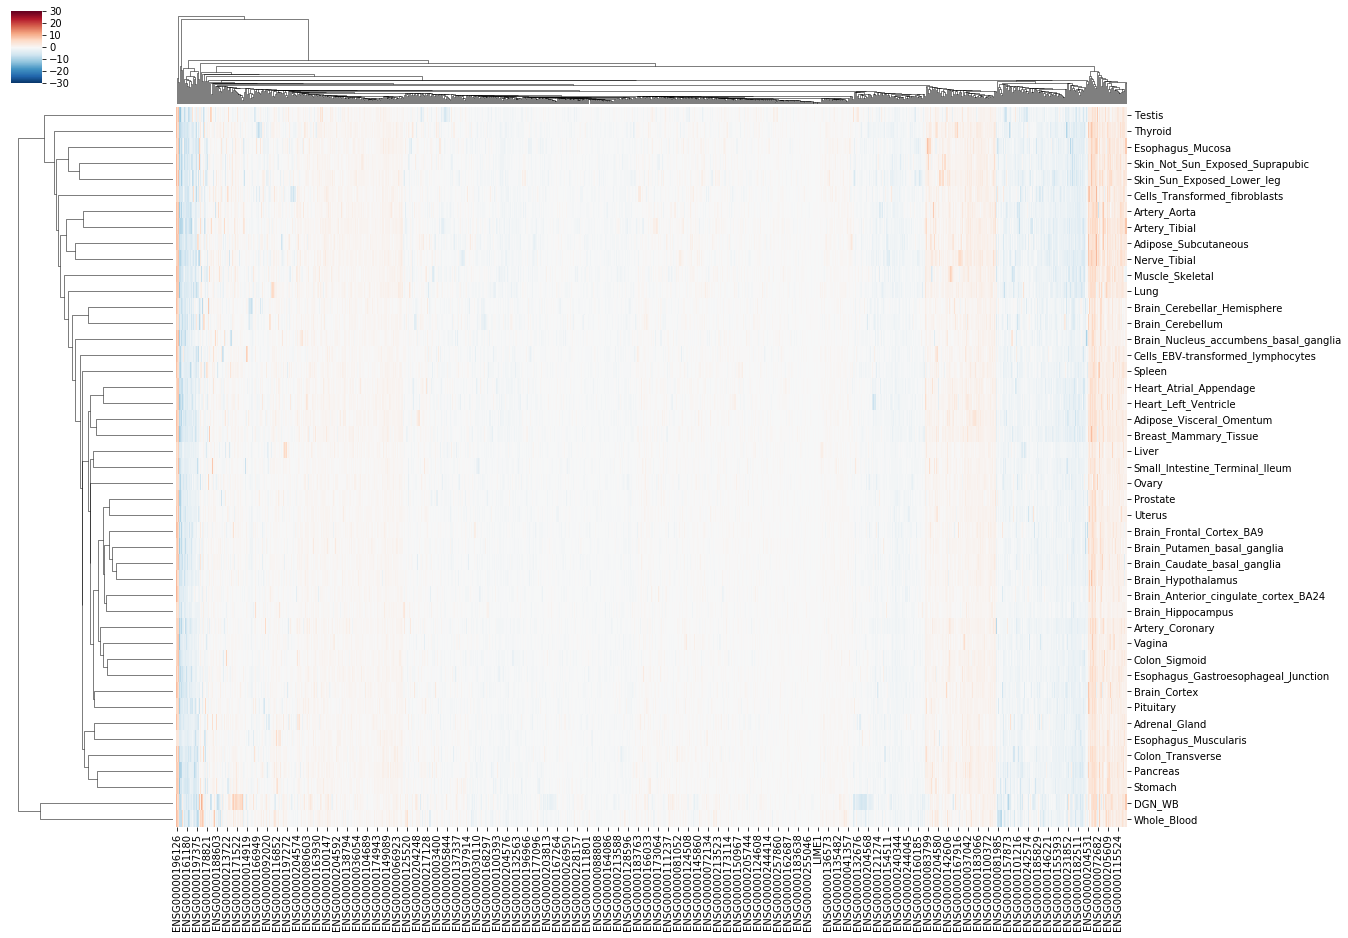

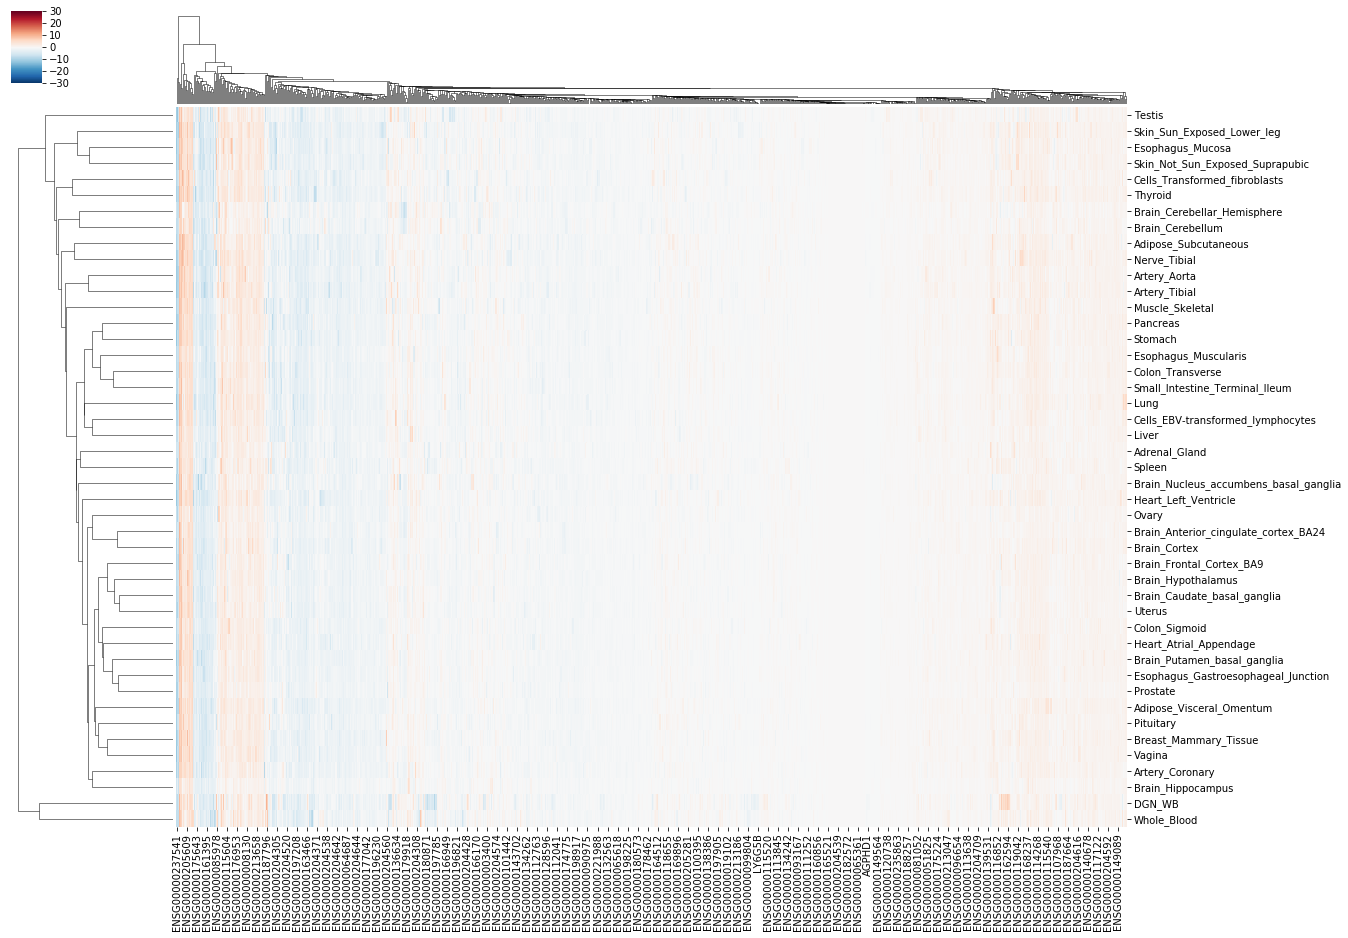

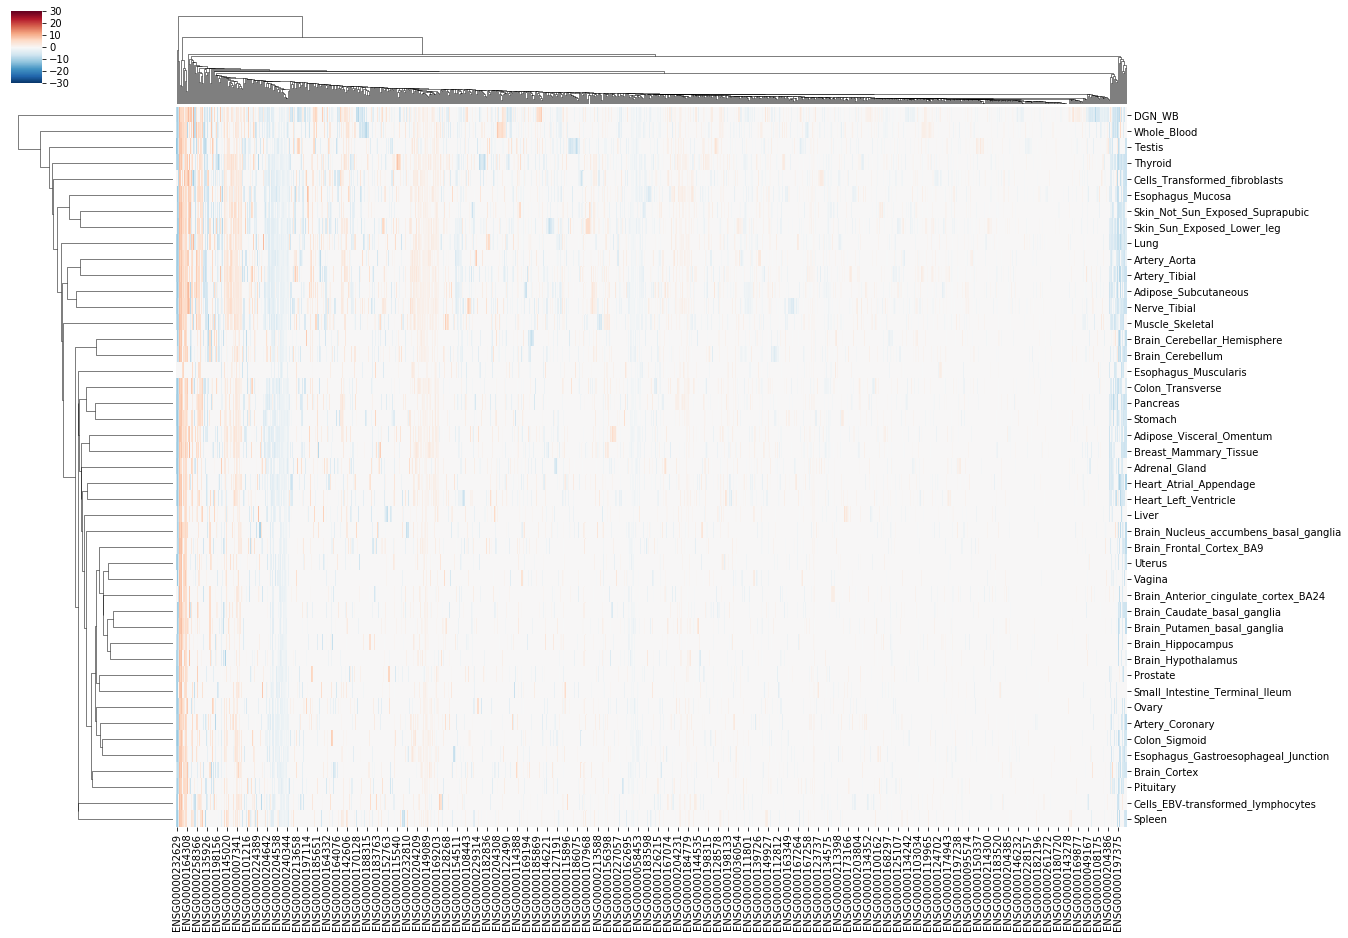

IBD.EUR.Ulcerative_Colitis


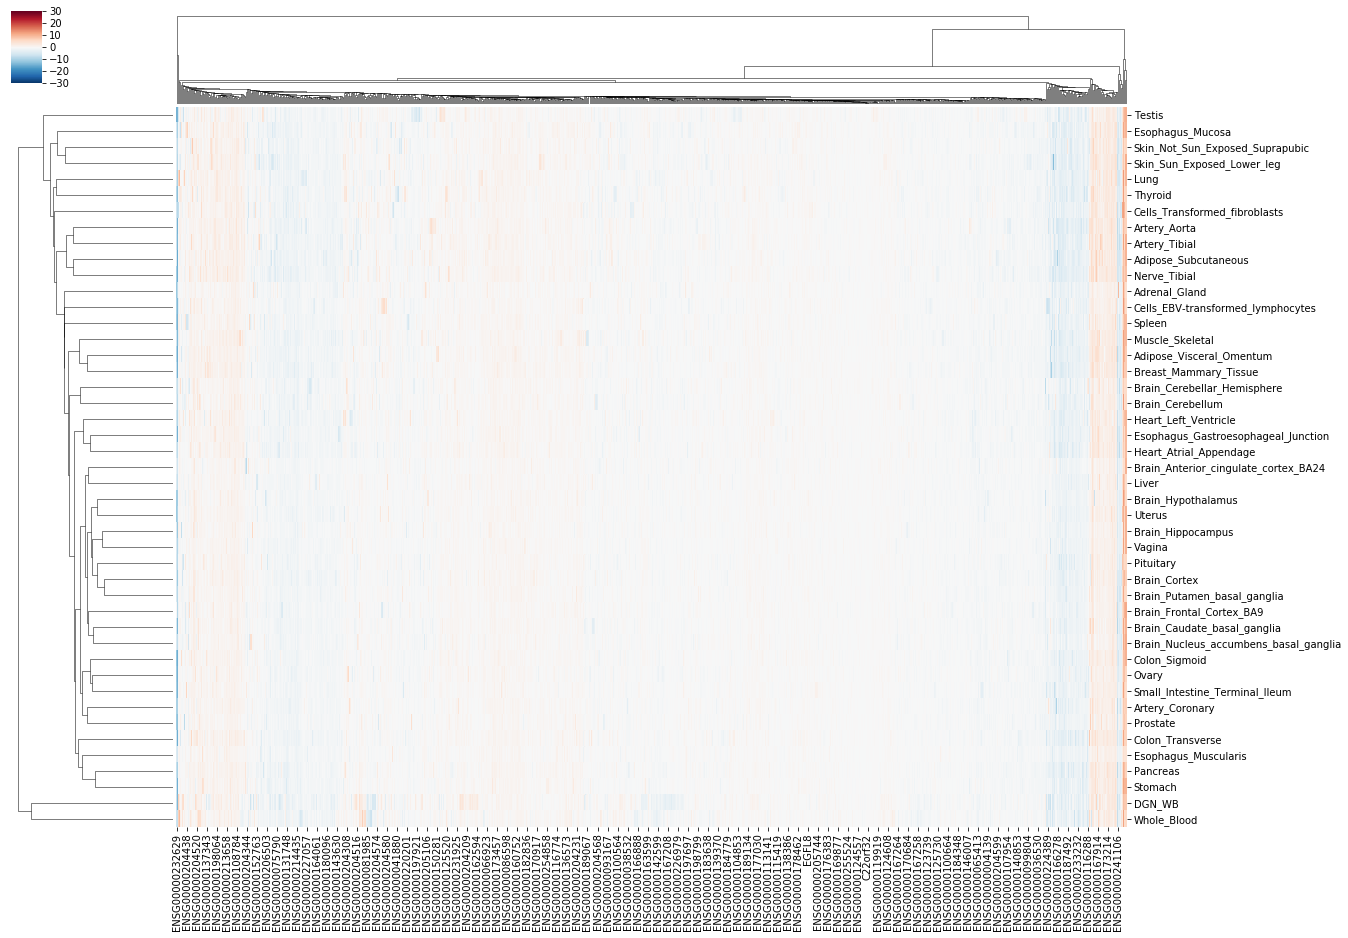

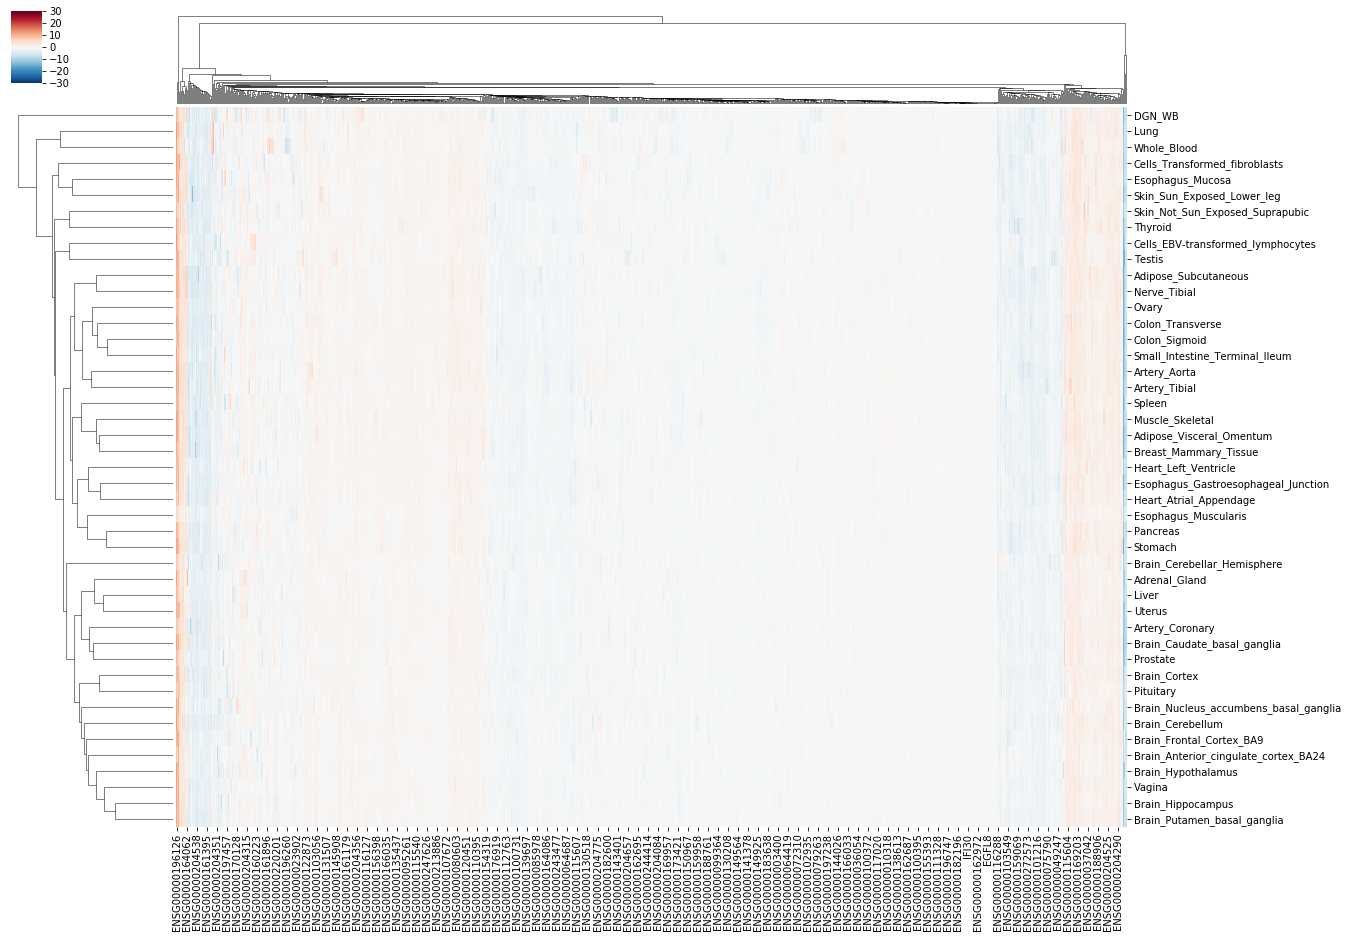

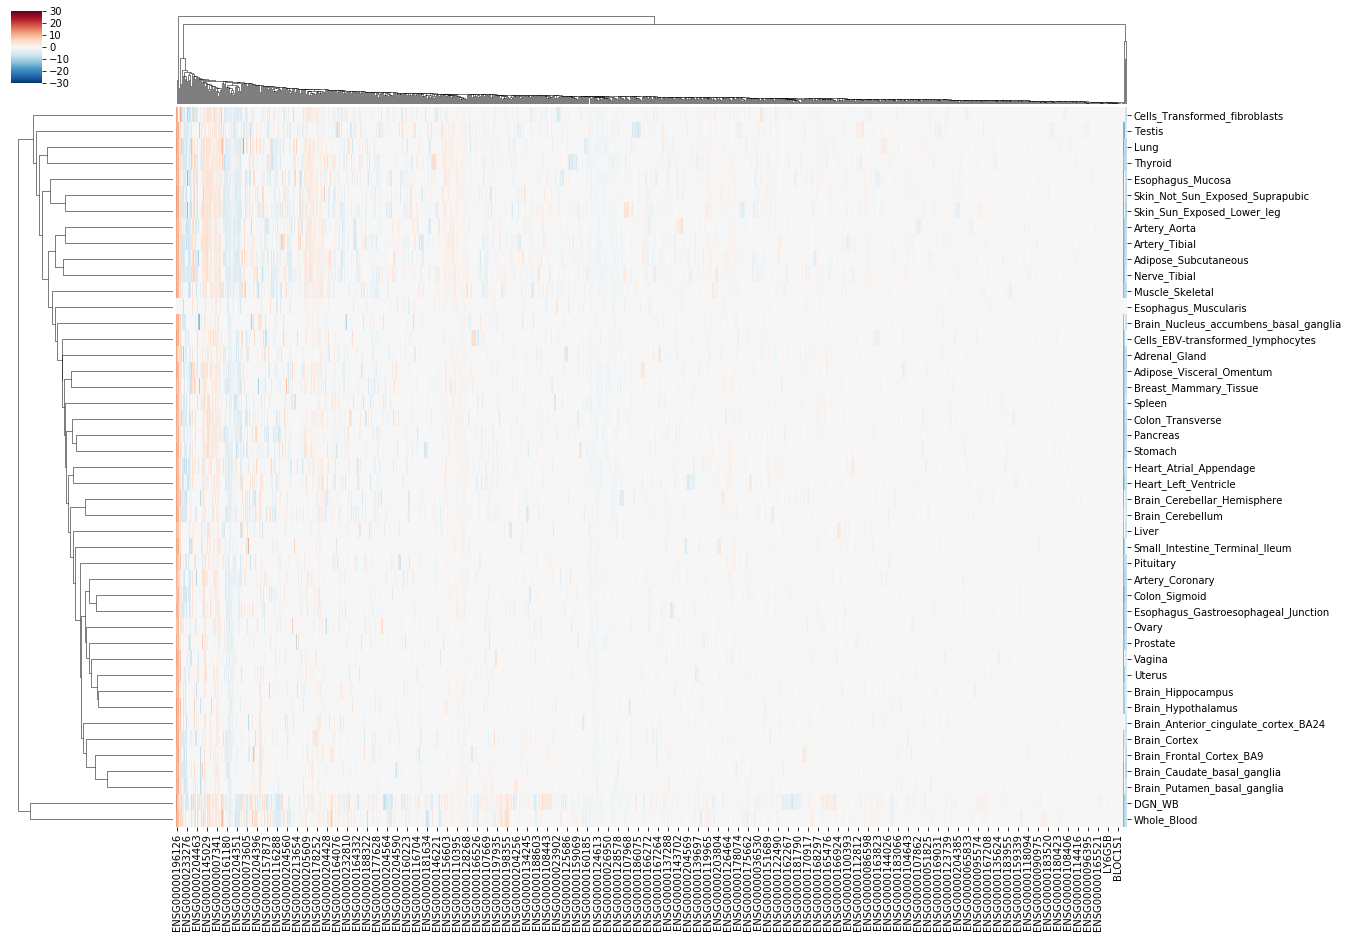

IMMUNOBASE_Celiac_disease_hg19


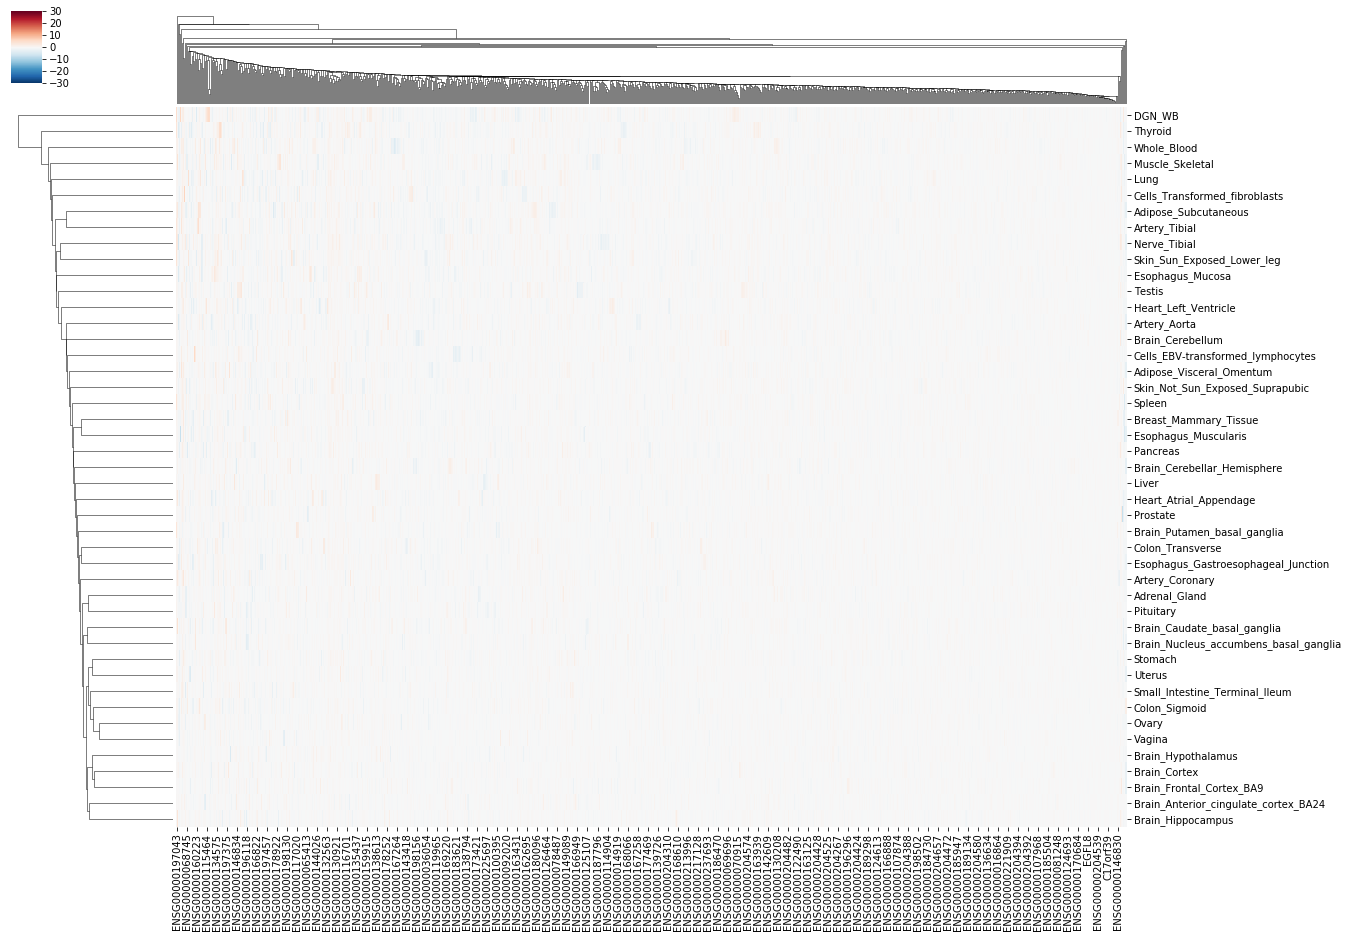

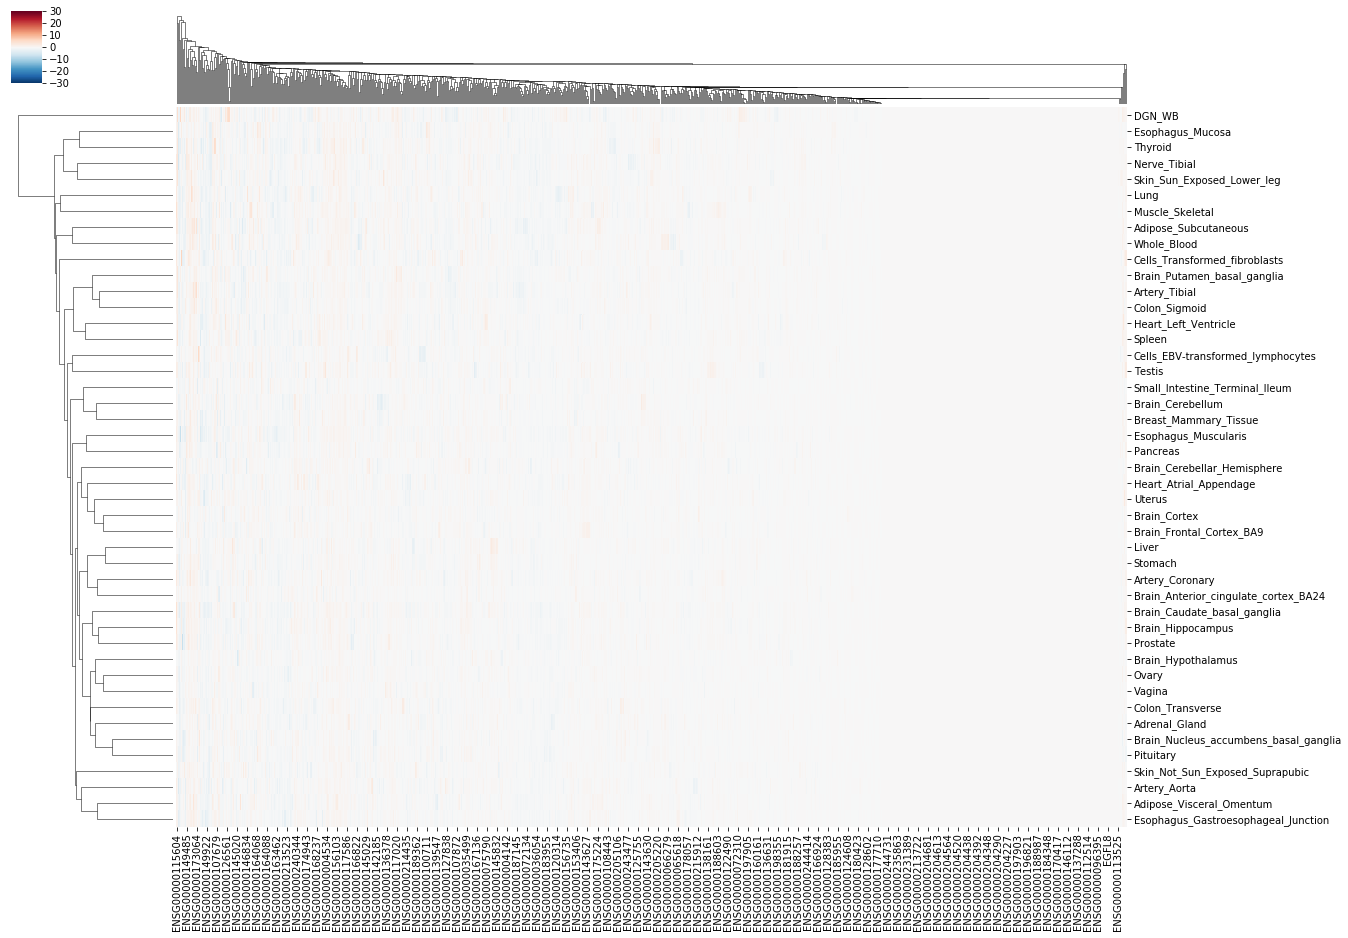

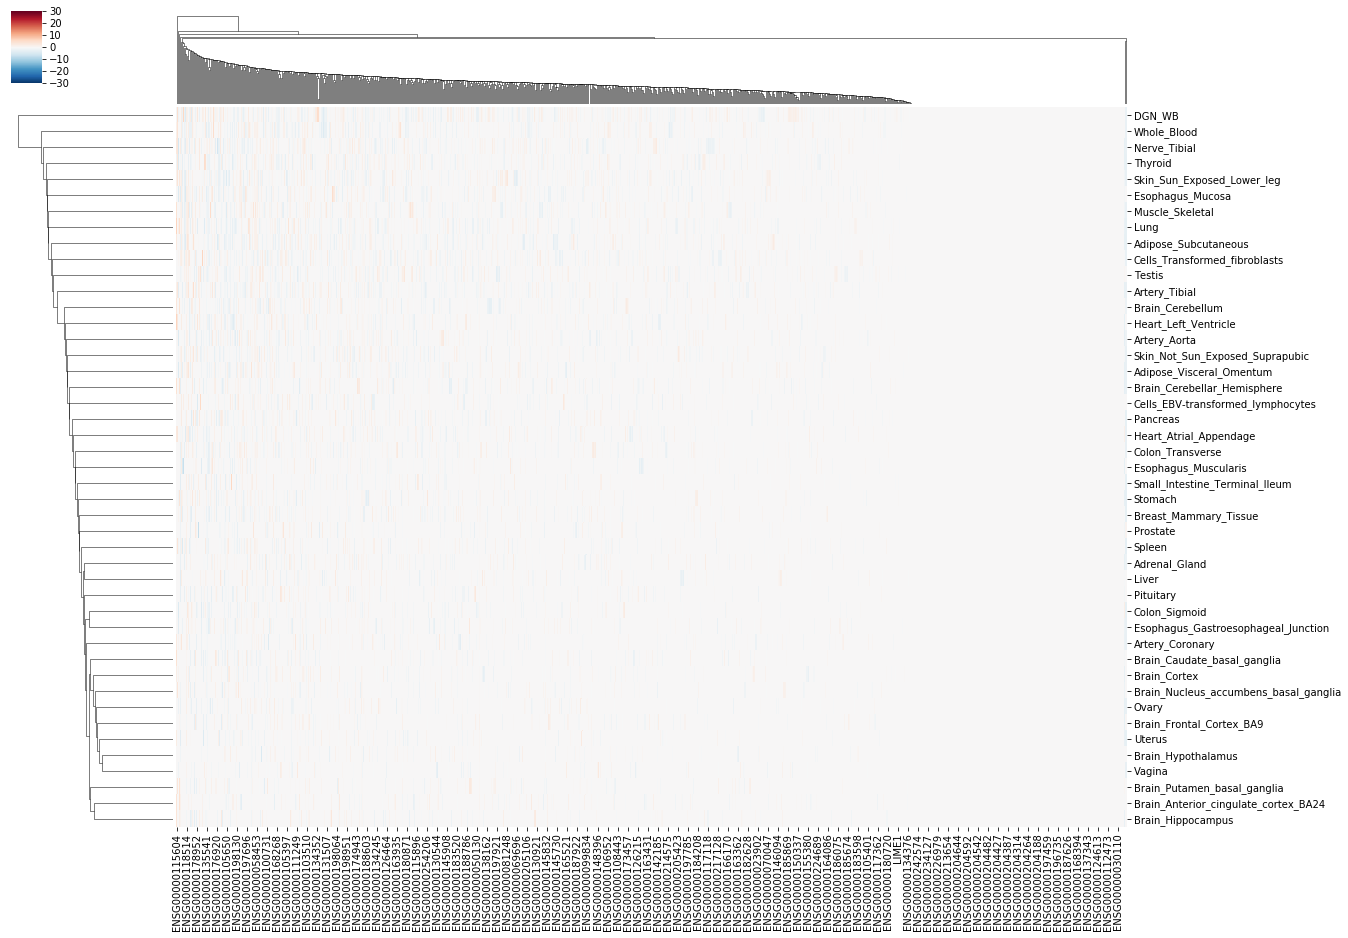

IMMUNOBASE_Multiple_sclerosis_hg19


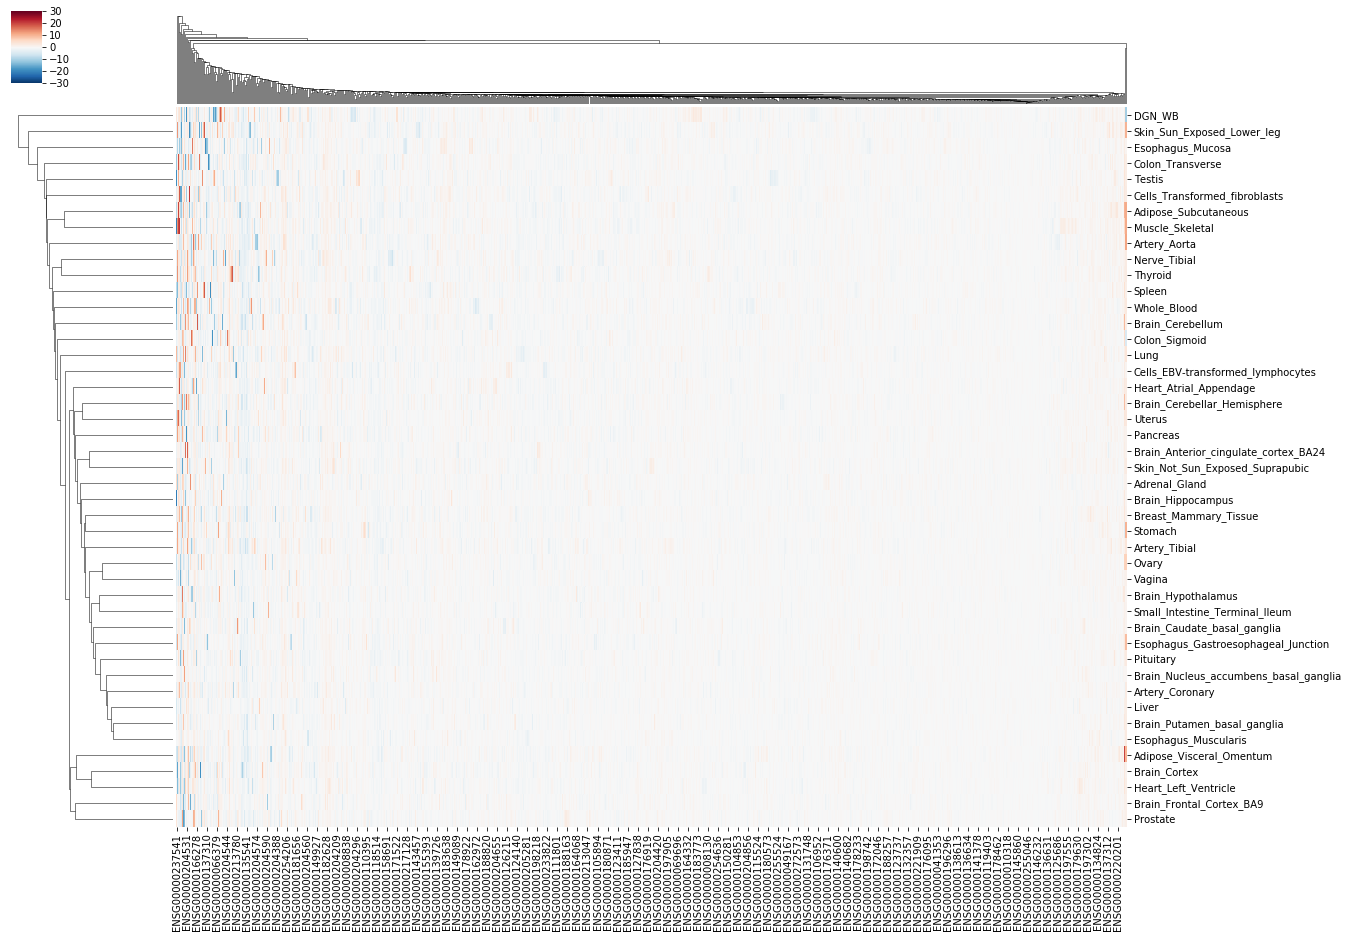

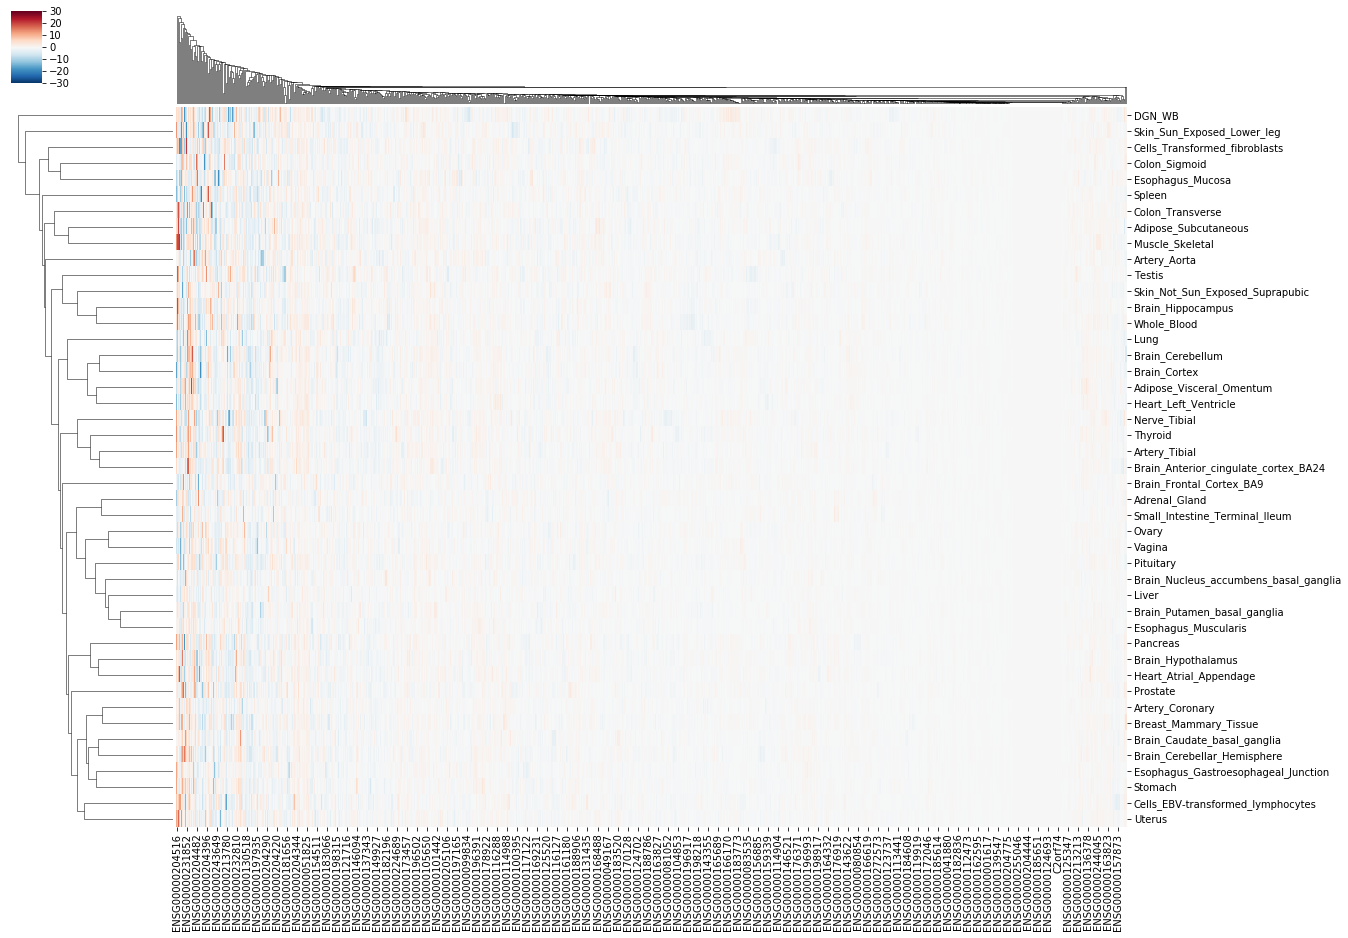

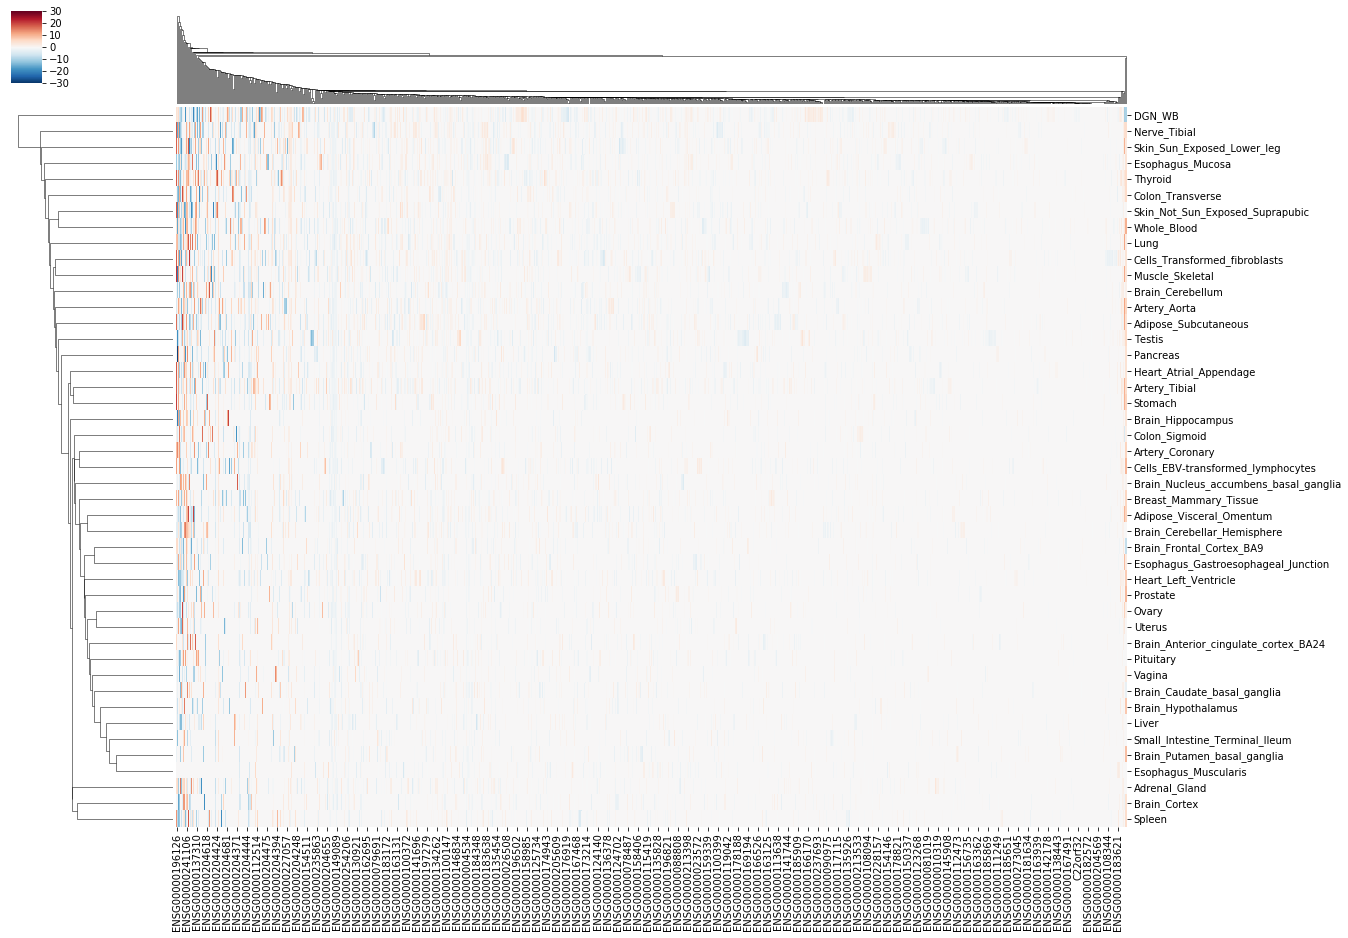

IMMUNOBASE_Systemic_lupus_erythematosus_hg19


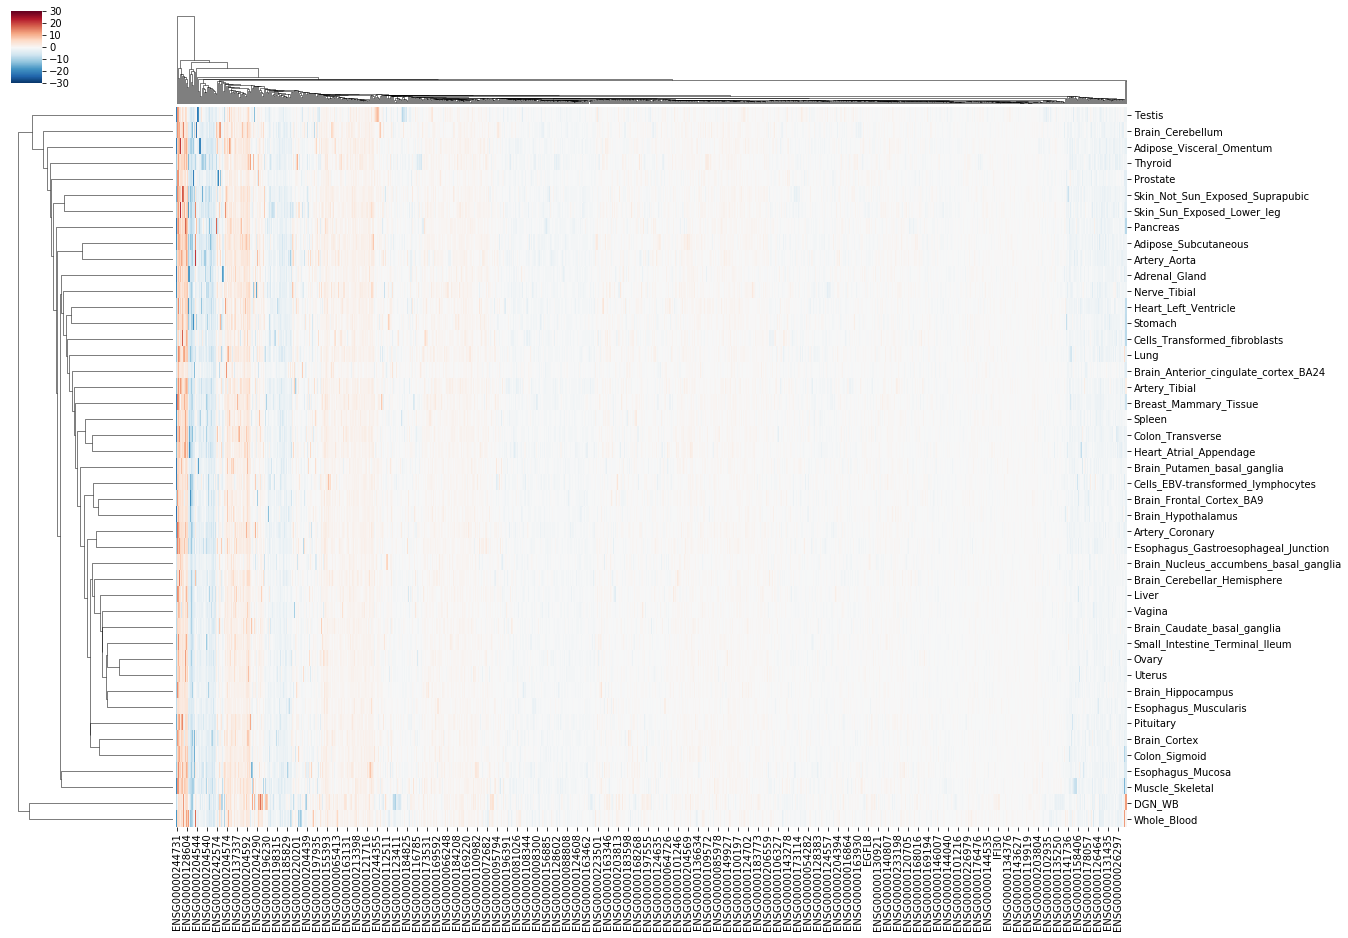

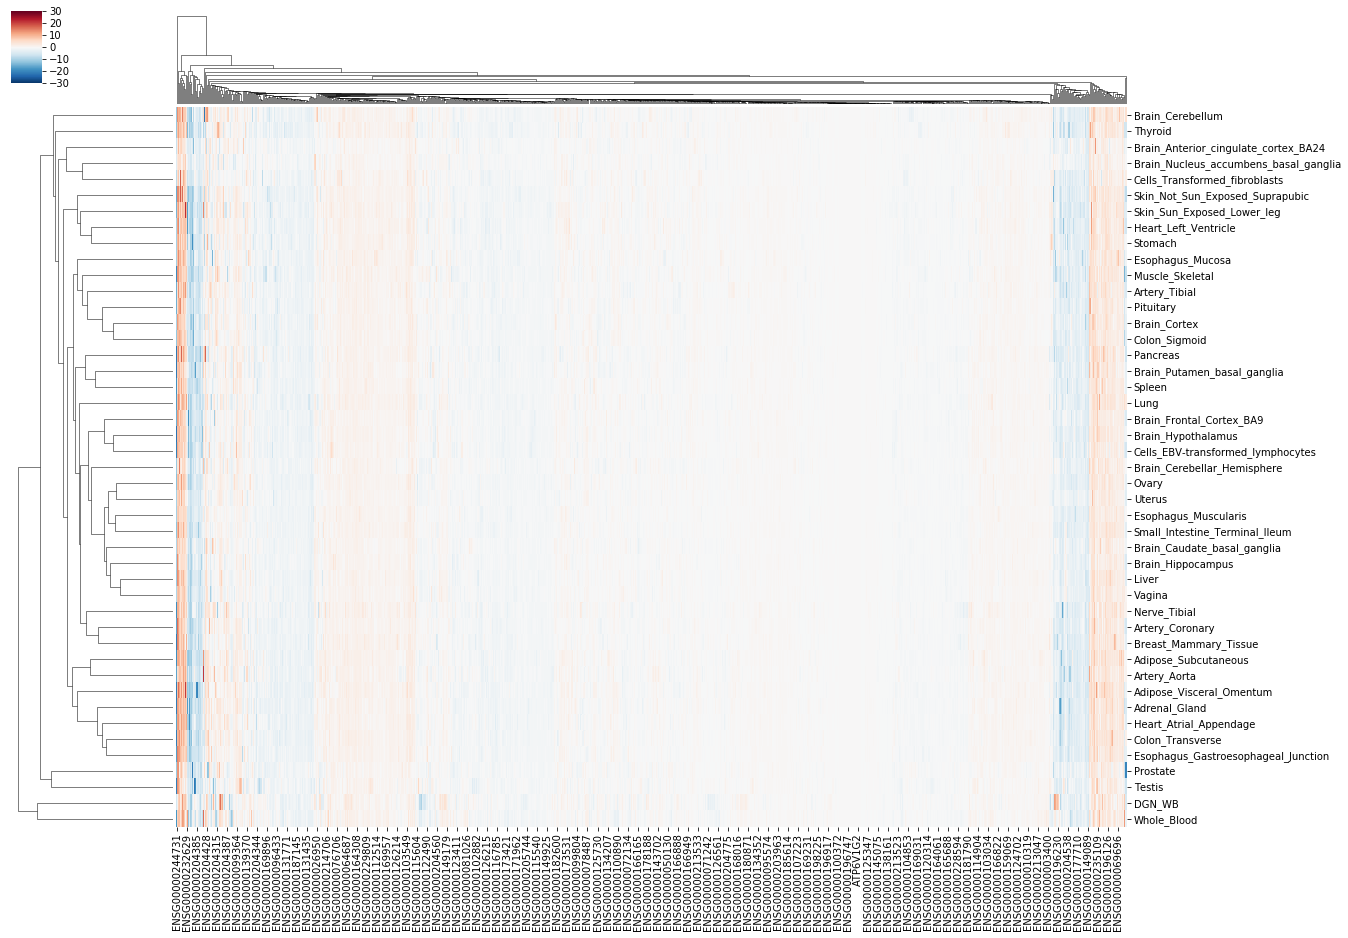

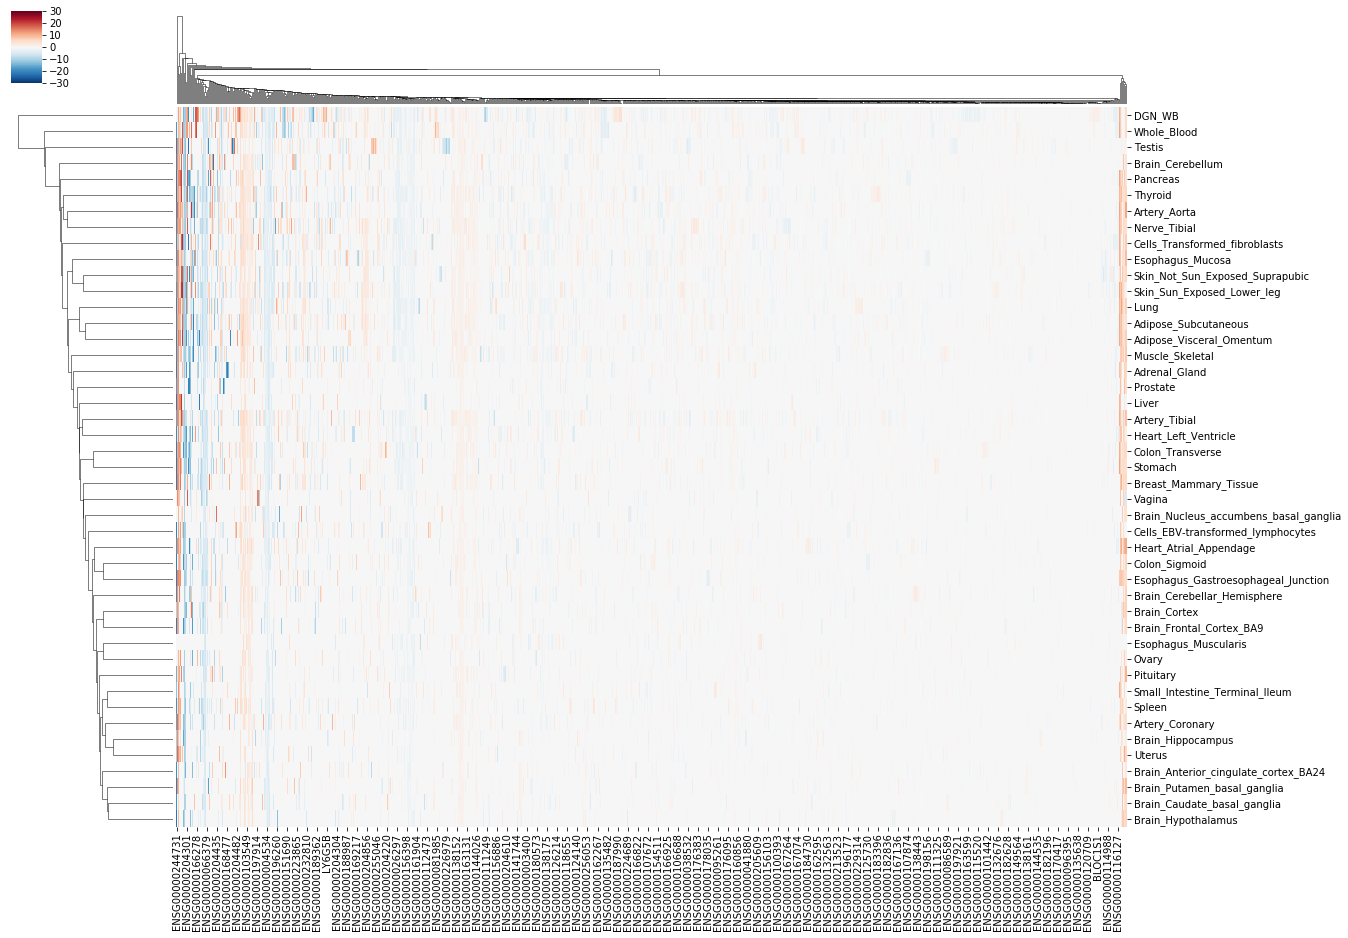

RA_OKADA_TRANS_ETHNIC


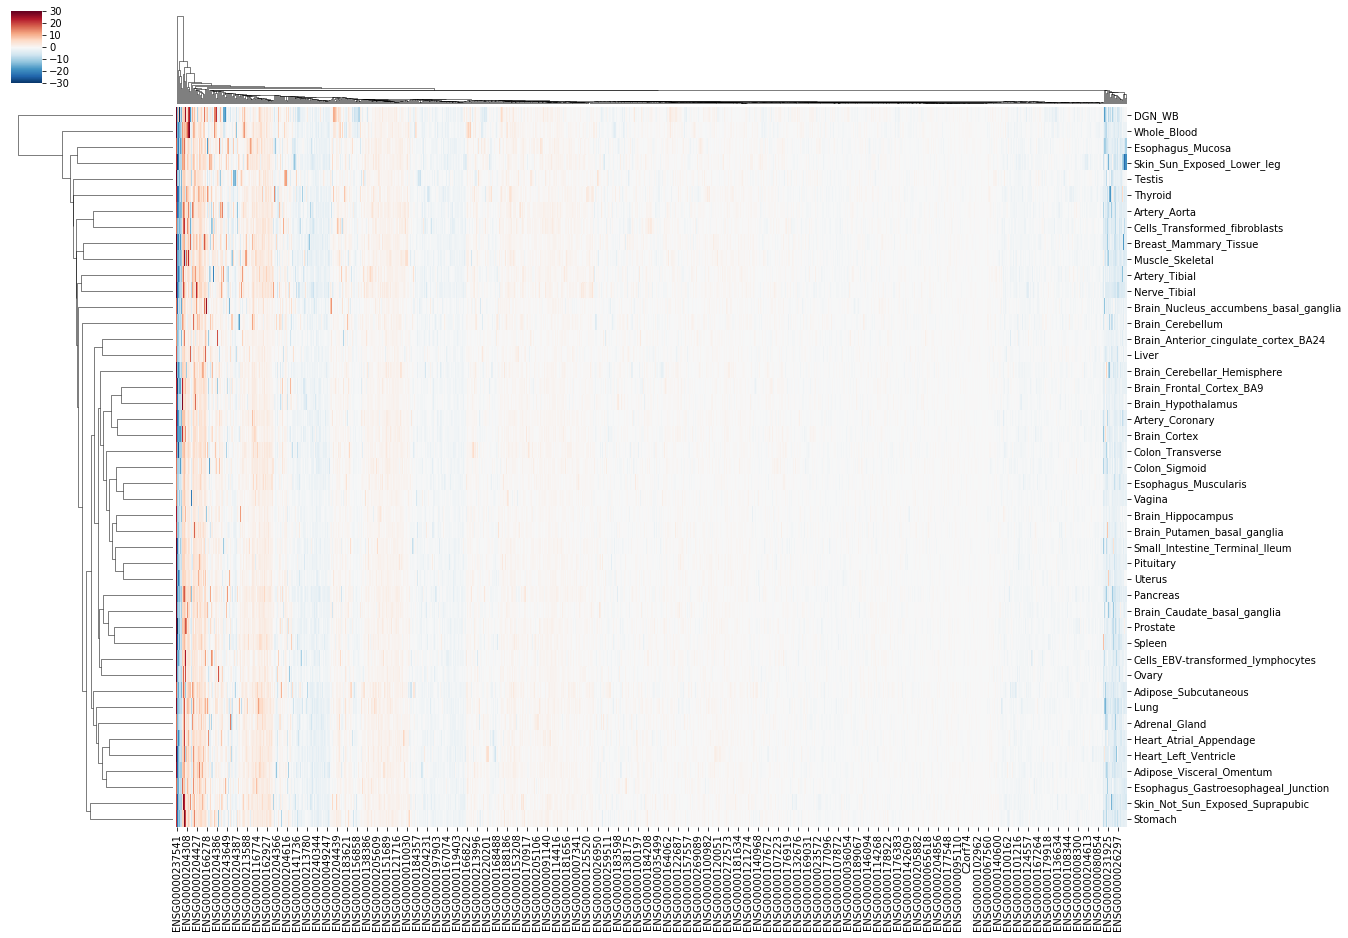

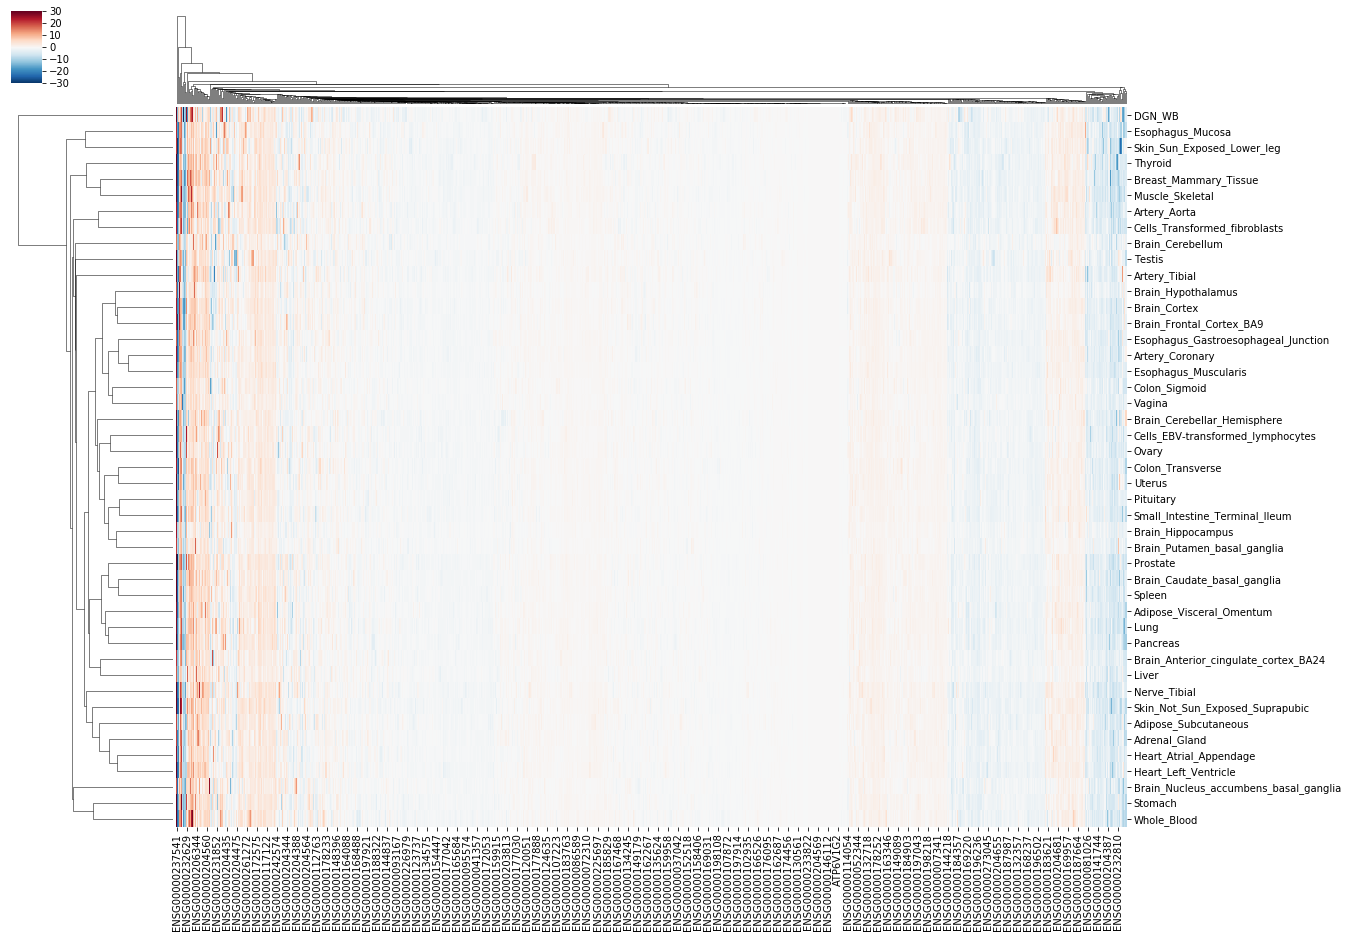

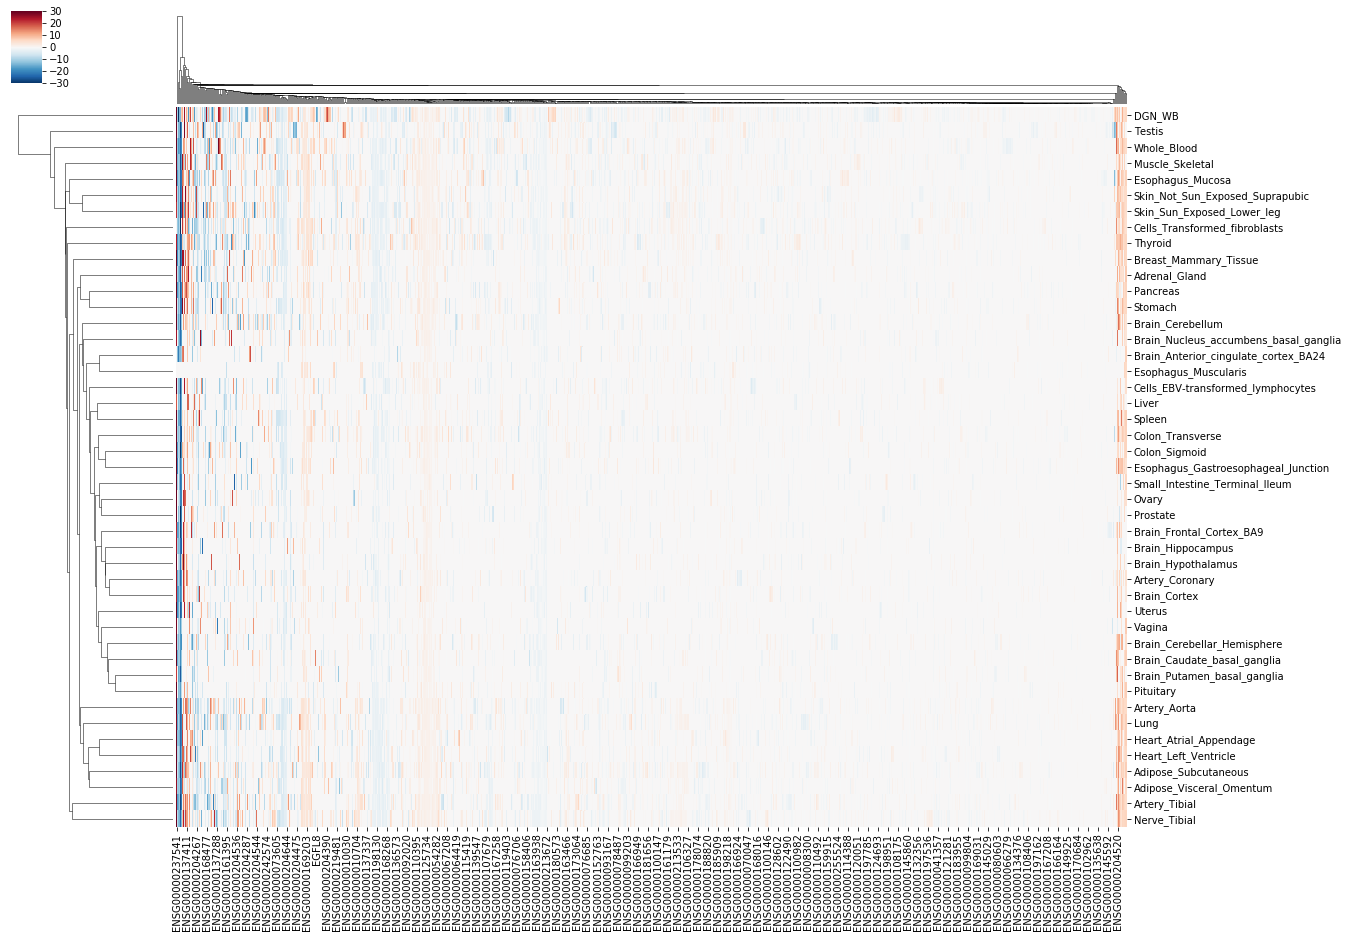

dbGAP_Baranzini_MultipleSclerosis


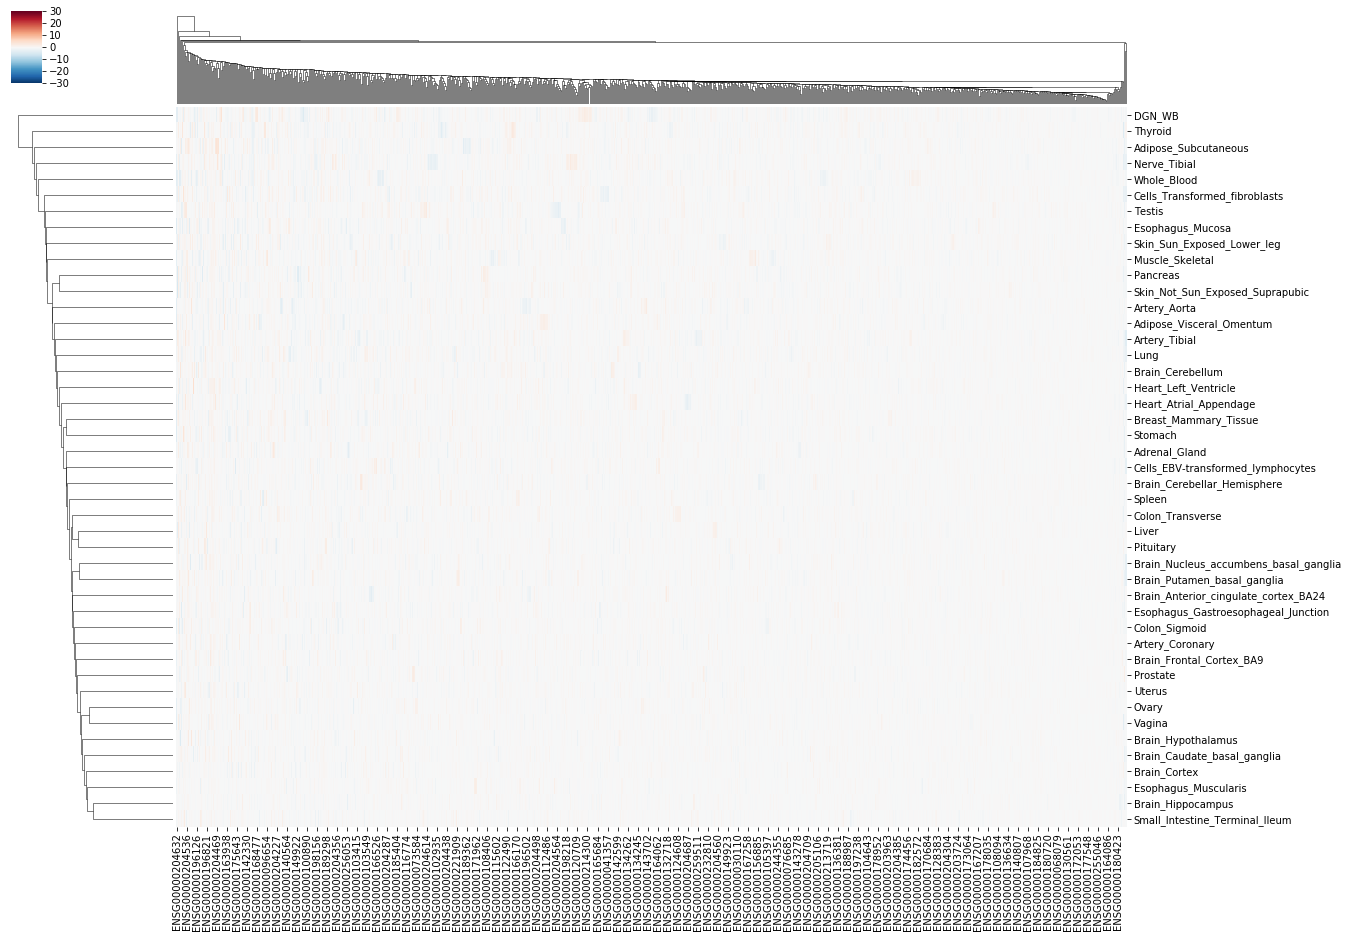

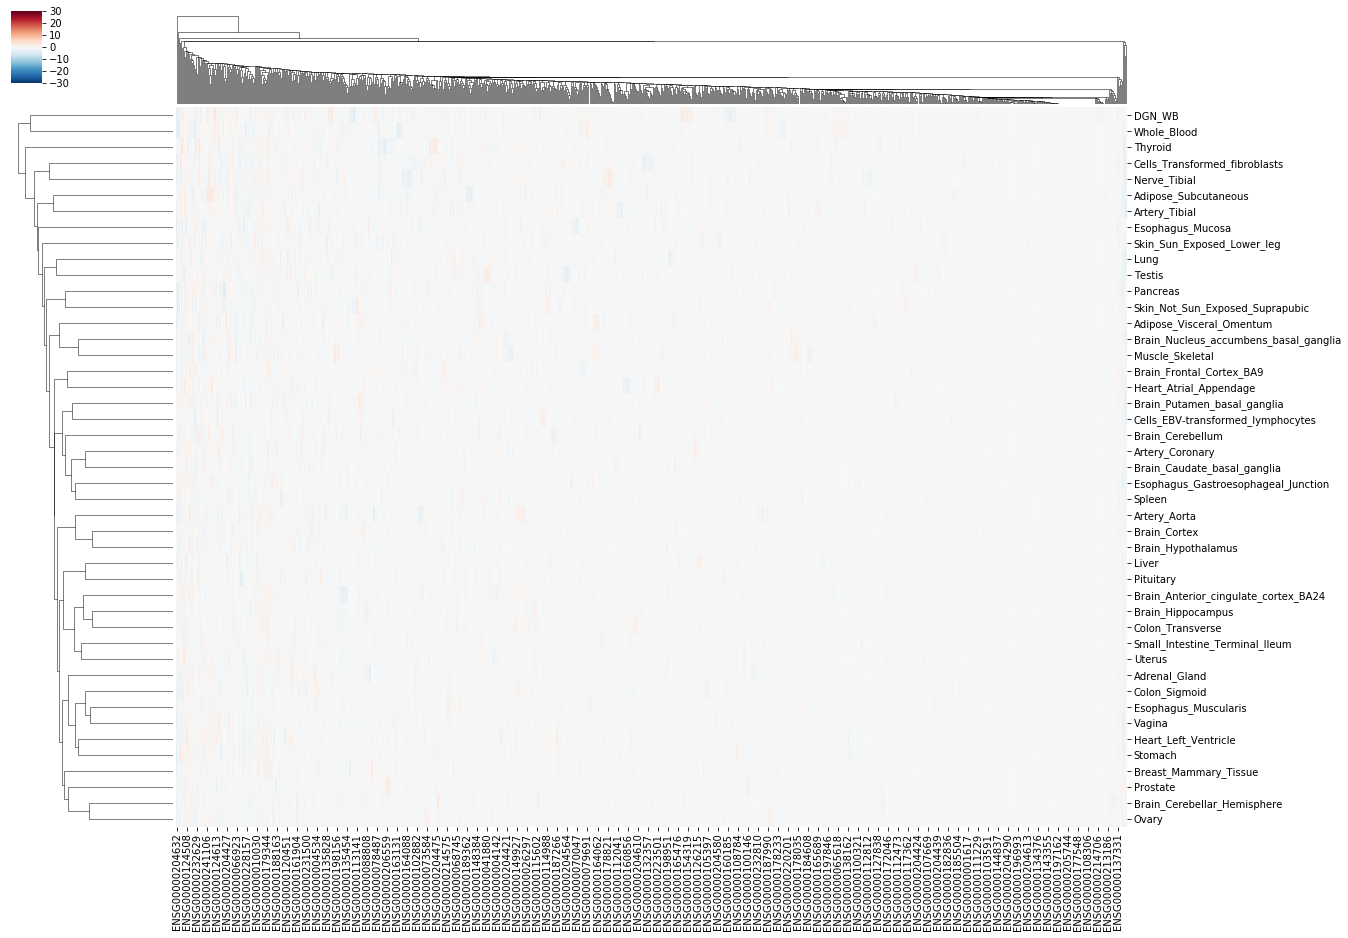

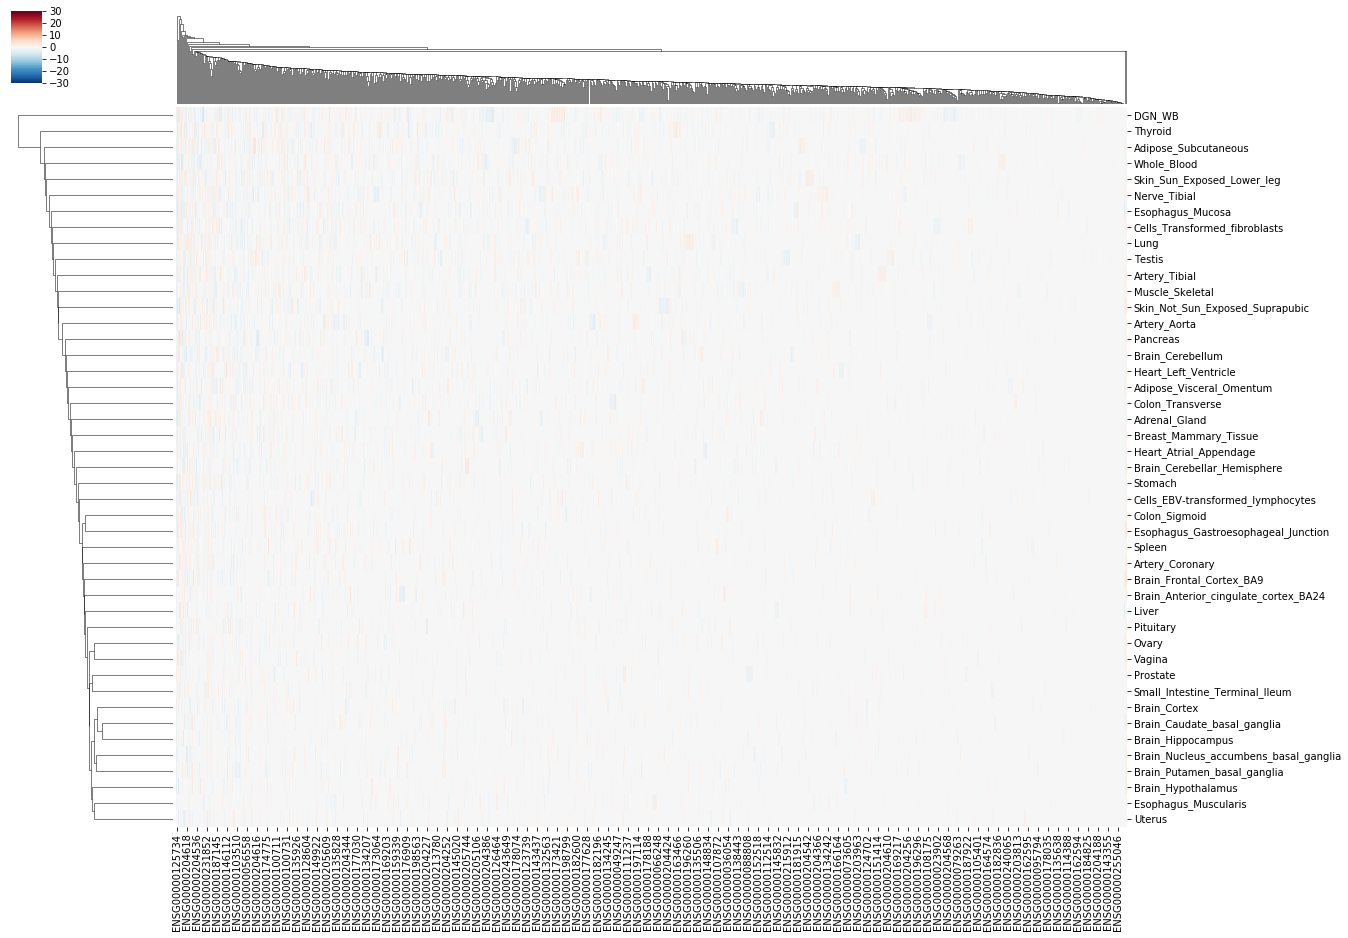

dbGAP_Duerr_InflammatoryBowelDisease


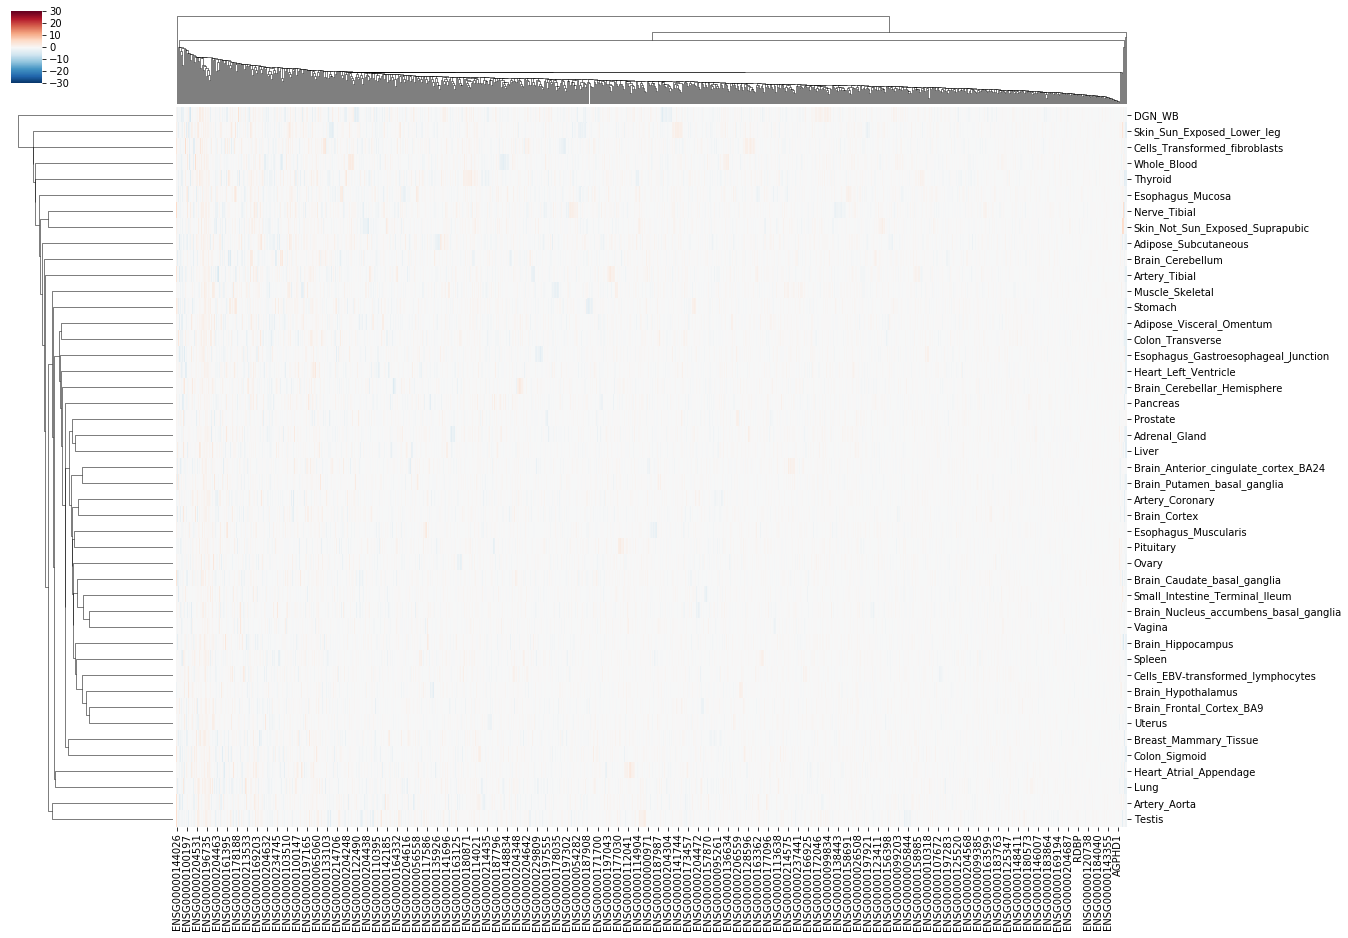

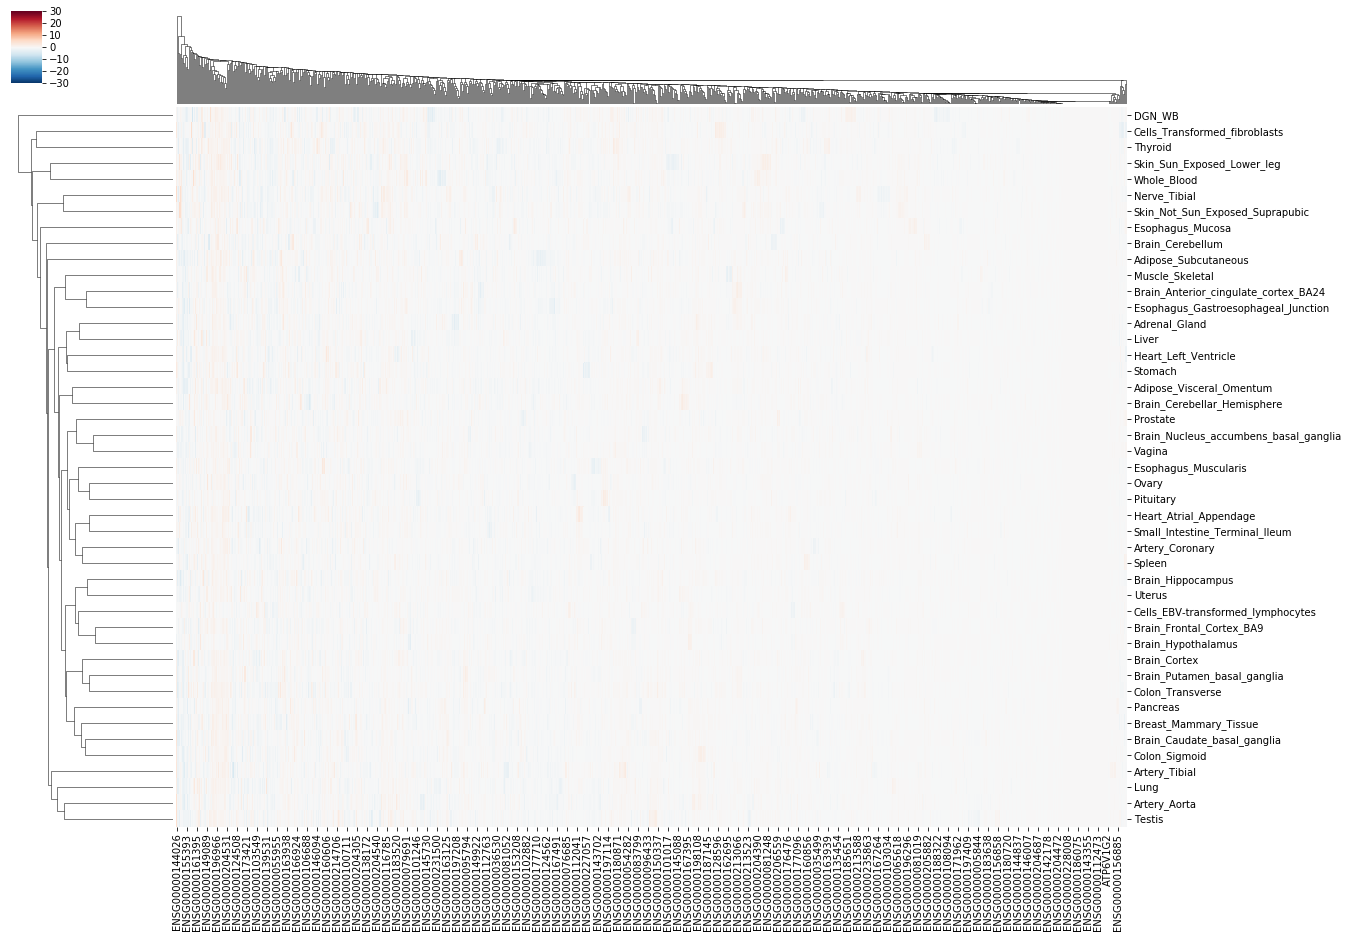

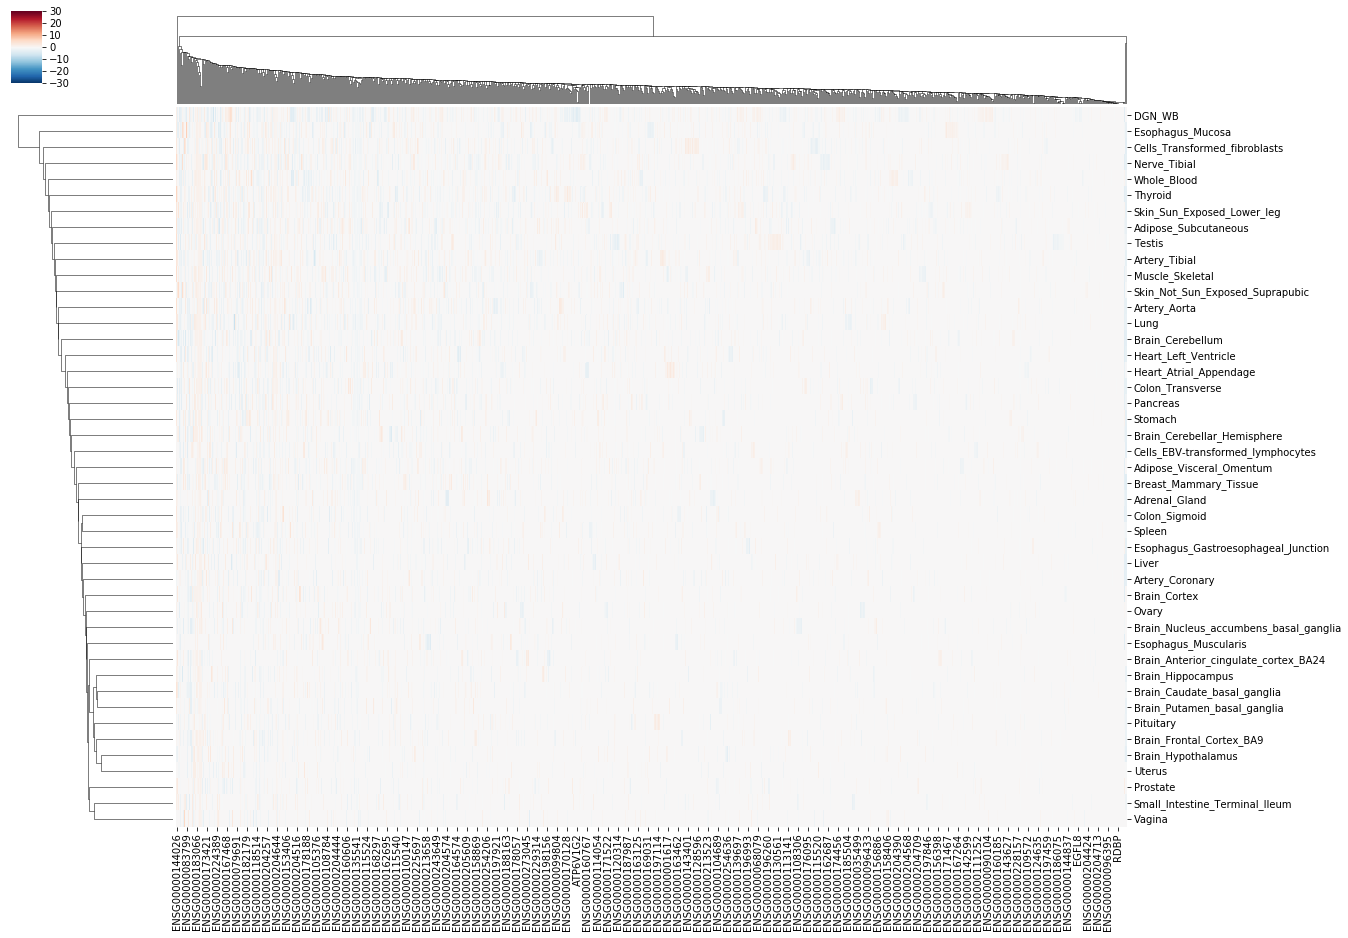

dbGAP_Hom_SystemicLupusErythematosus


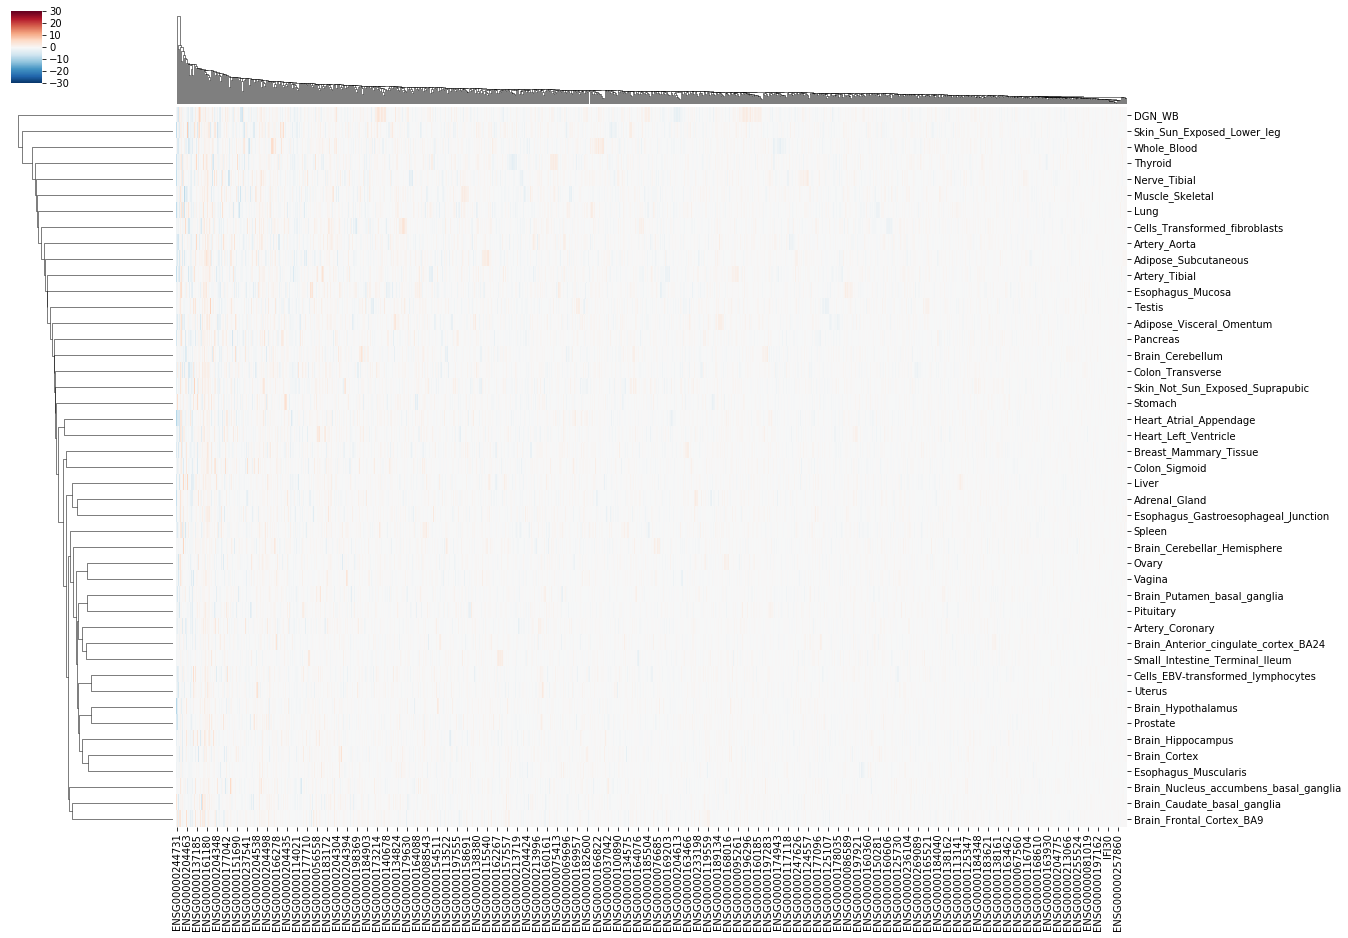

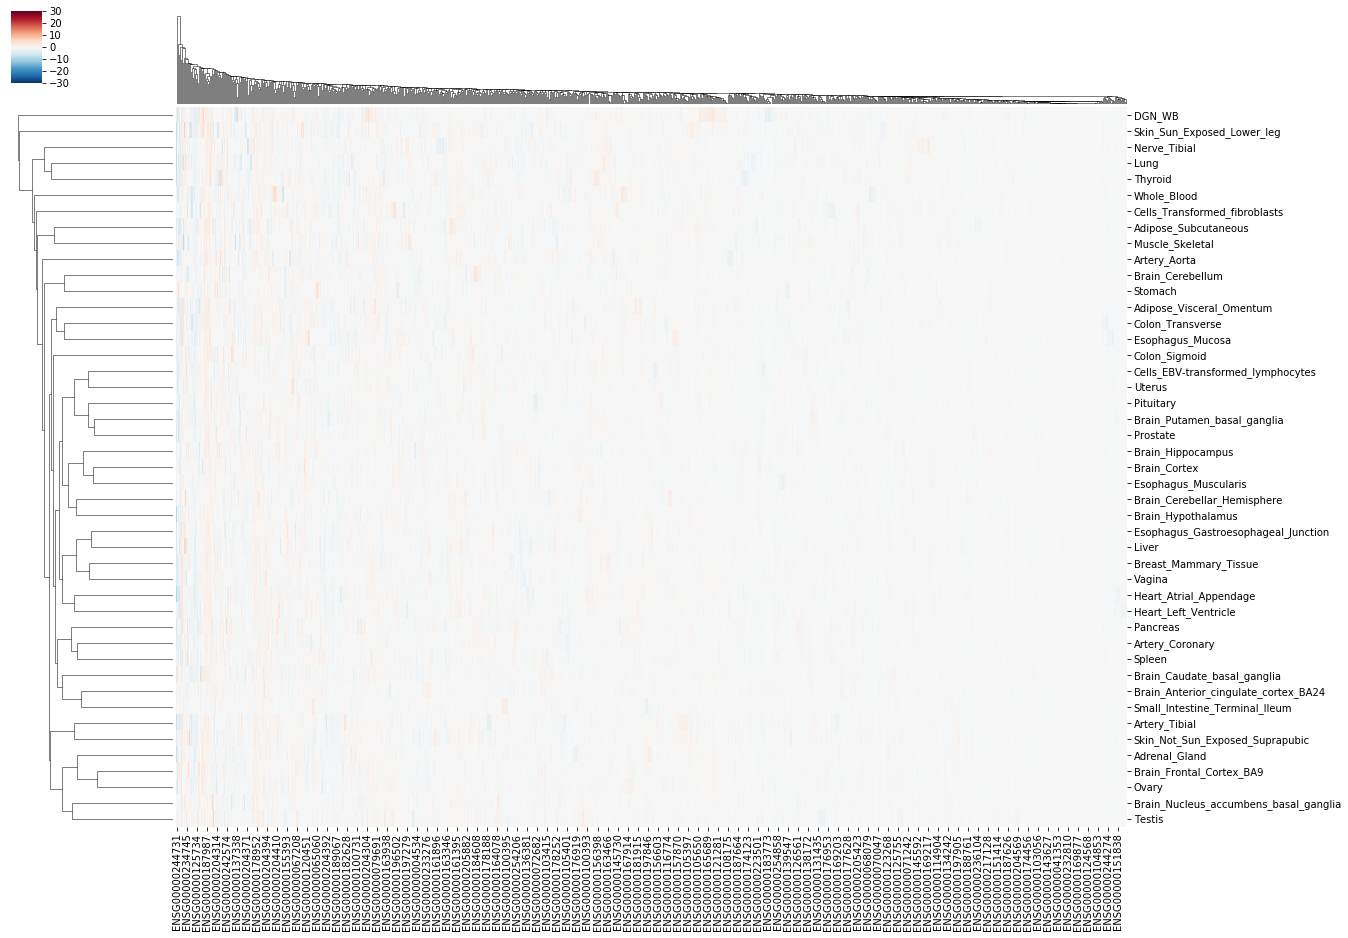

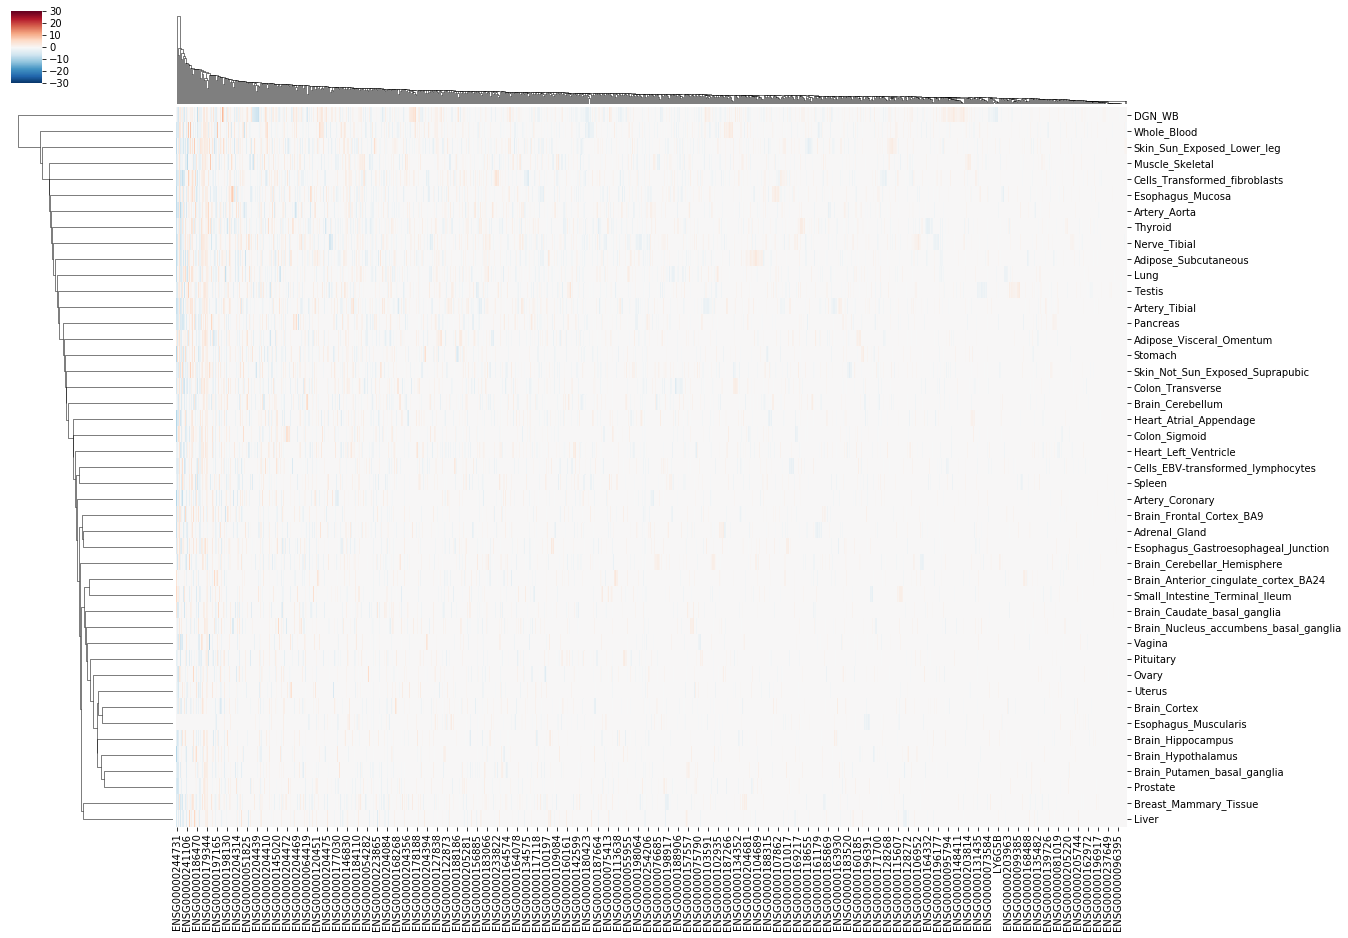

dbGAP_Hunter_BreastCancer


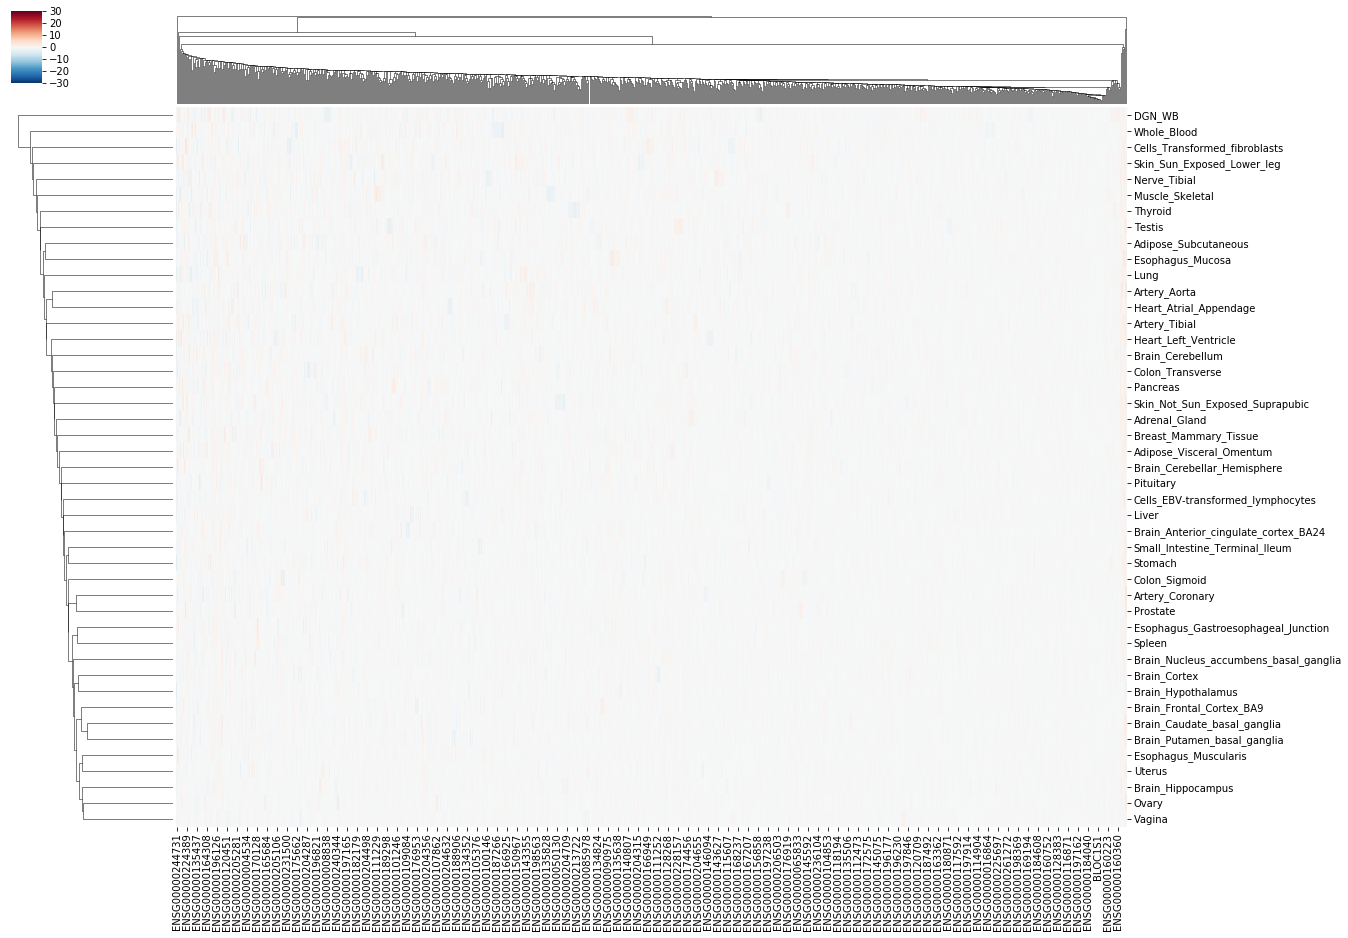

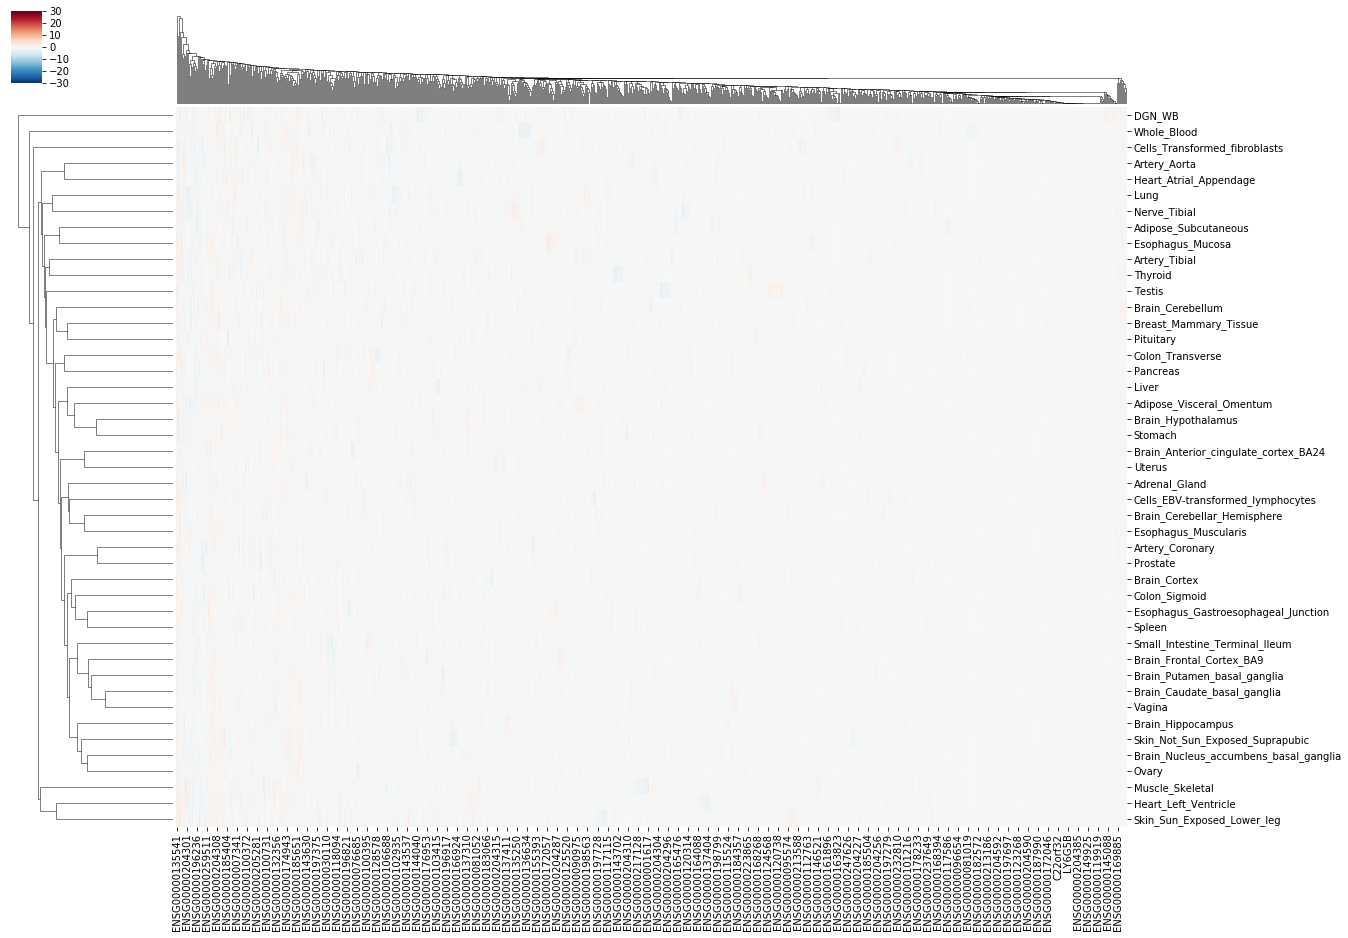

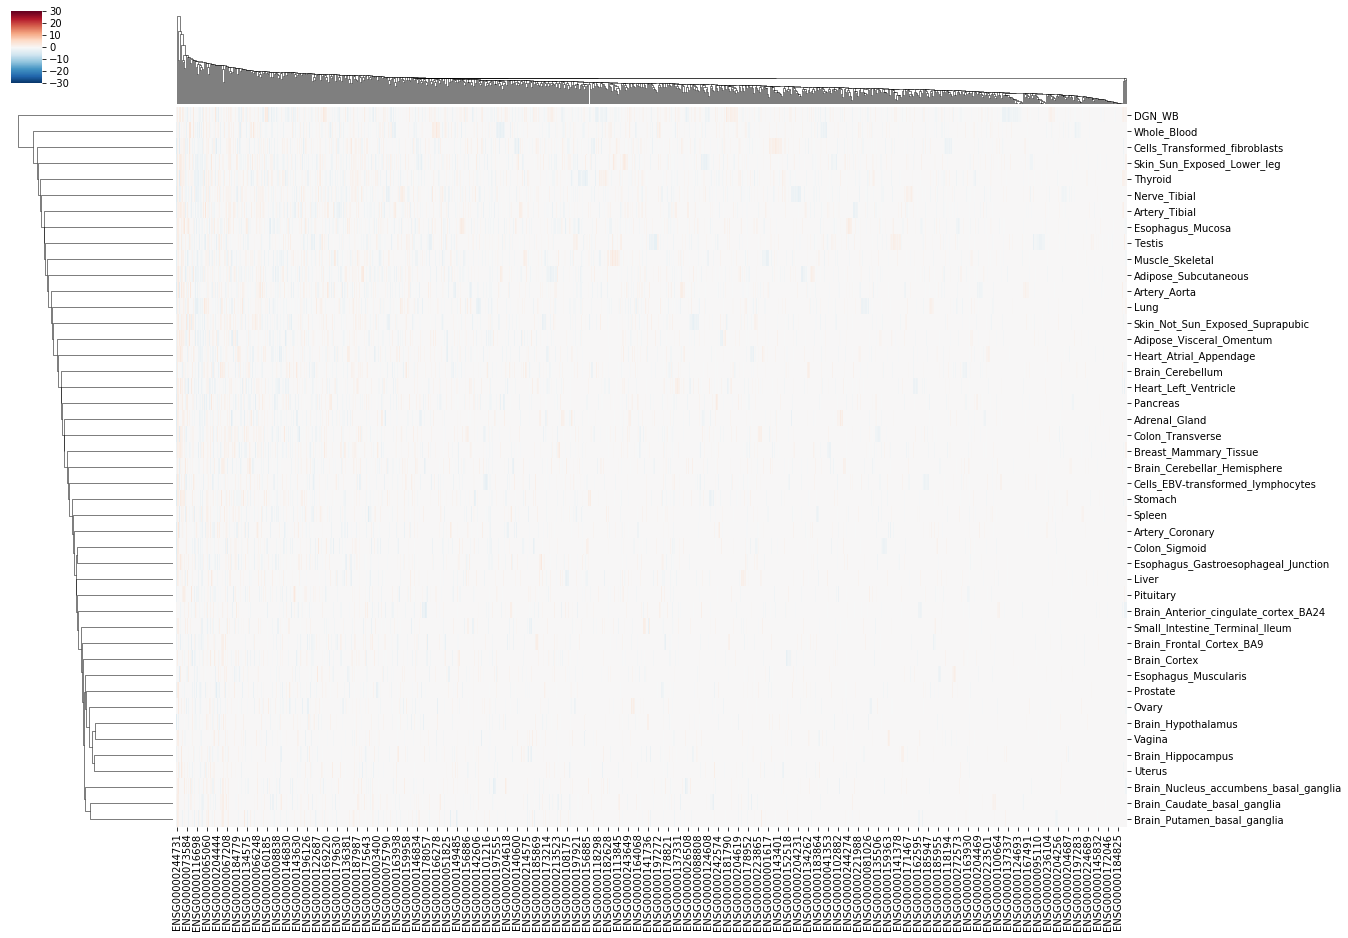

pgc.scz2


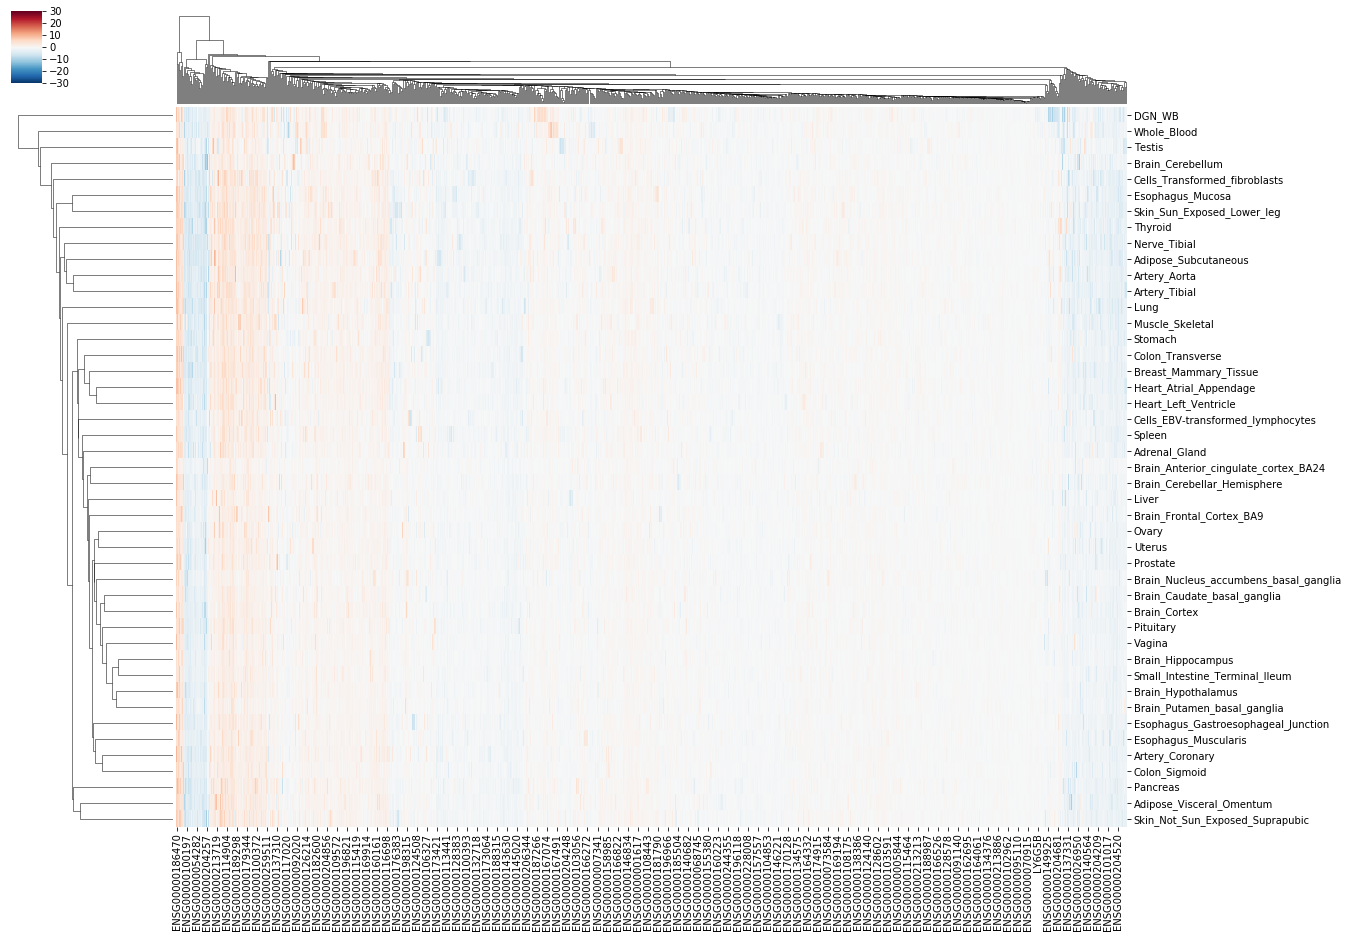

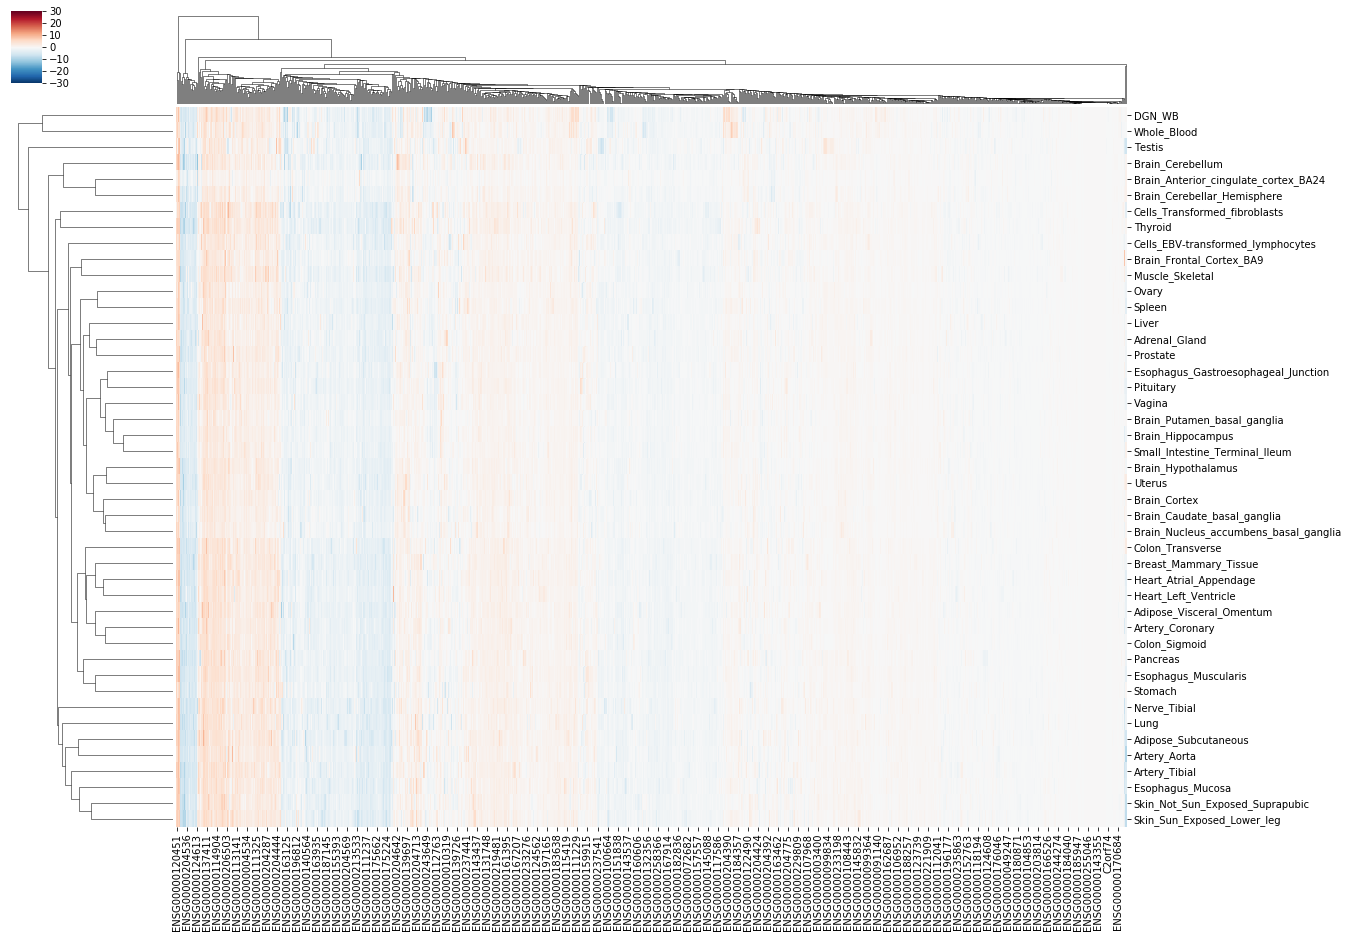

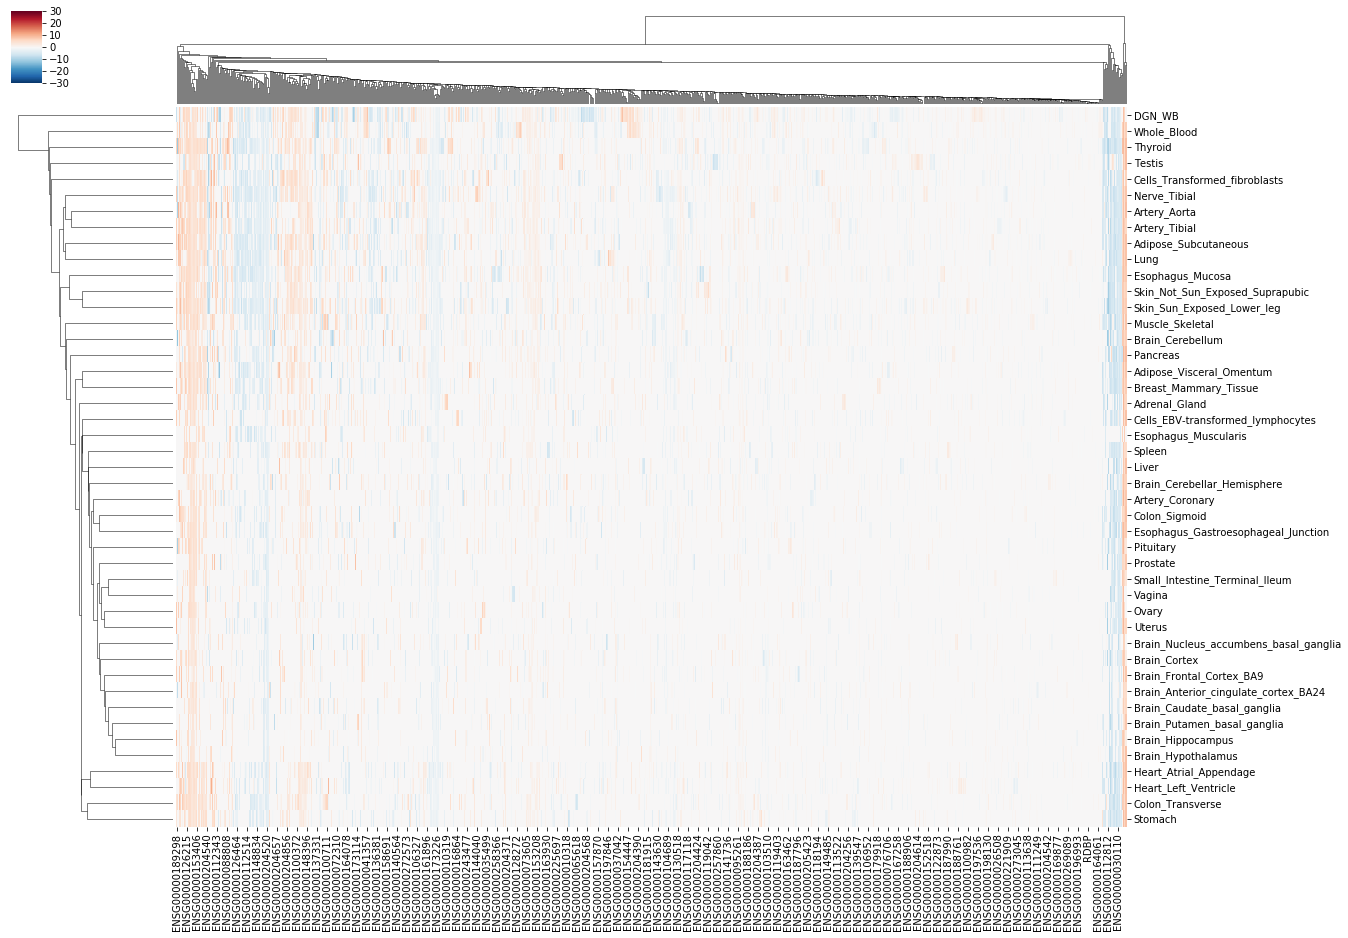

In [111]:
import pandas as pd

for i in range(len(id2phenotype)):
    print id2phenotype[i]
    sns.clustermap(pd.DataFrame(res_tc[i, :, :], index = id2tissue, columns = [id2gene[j] for j in np.where(ind)[0]]), 
                   cmap = 'RdBu_r', 
                   vmax = 30, vmin = -30, figsize = (20, 15))
    plt.show()
    sns.clustermap(pd.DataFrame(res_mc[i, :, :], index = id2tissue, columns = [id2gene[j] for j in np.where(ind)[0]]), 
                   cmap = 'RdBu_r', 
                   vmax = 30, vmin = -30, figsize = (20, 15))
    plt.show()
    sns.clustermap(pd.DataFrame(mat0[i, :, :], index = id2tissue, columns = [id2gene[j] for j in np.where(ind)[0]]), 
                   cmap = 'RdBu_r', 
                   vmax = 30, vmin = -30, figsize = (20, 15))
    plt.show()